<a href="https://colab.research.google.com/github/rafaelst97/AnaliseDadosDesmatamento/blob/main/Trabalho_das_UCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **(VAI PARA O TRABALHO)Aqui foi começado o tratamento para adicionar ano e semestre em cada arquivo**

In [ ]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Substitua pelo caminho completo do arquivo CSV dentro do Google Drive
caminho_arquivo = '/content/drive/My Drive/IA M1/cnuc_2022_01sem.csv'

# Carregar o arquivo CSV com o delimitador correto (ponto e vírgula)
df = pd.read_csv(caminho_arquivo, sep=';')

# Adicionar as colunas solicitadas "Ano" e "Semestre" corretamente
df['Ano'] = 2022
df['Semestre'] = 1

# Verificar se as colunas foram adicionadas corretamente
print(df.head())

# Caminho para salvar o arquivo CSV atualizado
caminho_salvar = '/content/drive/My Drive/IA M1/dados atualizados/cnuc_2022_01sem.csv'

# Salvar o arquivo com as novas colunas, usando o delimitador ponto e vírgula novamente
df.to_csv(caminho_salvar, sep=';', index=False)

print(f"Arquivo atualizado salvo em: {caminho_salvar}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf3 in position 7: invalid continuation byte

**(VAI PARA O TRABALHO)Aqui só foi um tratamento porque tinha um xlsx perdido no meio dos dados das UCs**

In [ ]:
import pandas as pd

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Substitua pelo caminho completo do arquivo .xlsx dentro do Google Drive
caminho_arquivo_xlsx = '/content/drive/My Drive/IA M1/cnuc_2023_07_v3.xlsx'

# Carregar o arquivo Excel
df = pd.read_excel(caminho_arquivo_xlsx)

# Definir o caminho de saída para o CSV
caminho_arquivo_csv = '/content/drive/My Drive/cnuc_2023_07_v3.csv'

# Salvar o arquivo como CSV com separador personalizado (ponto e vírgula) e codificação UTF-8
df.to_csv(caminho_arquivo_csv, sep=';', index=False, encoding='utf-8')

print(f"Arquivo convertido salvo em: {caminho_arquivo_csv}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo convertido salvo em: /content/drive/My Drive/cnuc_2023_07_v3.csv


**(VAI PARA O TRABALHO)No meio dos tratamentos, começou a dar um erro de encoding durante a adição dos anos de cada relatório**

In [ ]:
from google.colab import drive
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Substitua pelo caminho completo do arquivo CSV dentro do Google Drive
caminho_arquivo = '/content/drive/My Drive/IA M1/unidade-de-conservacao.csv'

# Carregar o arquivo CSV com o delimitador correto (ponto e vírgula) e a codificação ISO-8859-1
df = pd.read_csv(caminho_arquivo, sep=';', encoding='ISO-8859-1')

# Adicionar as colunas solicitadas "Ano" e "Semestre" corretamente
df['Ano'] = 2018
df['Semestre'] = 2

# Exibir as primeiras linhas do dataframe para garantir que as colunas foram adicionadas corretamente
print(df.head())

# Caminho para salvar o arquivo CSV atualizado
caminho_salvar = '/content/drive/My Drive/IA M1/dados atualizados/unidade-de-conservacao.csv'

# Salvar o arquivo com as novas colunas, usando o delimitador ponto e vírgula e a codificação correta (ISO-8859-1)
df.to_csv(caminho_salvar, sep=';', index=False, encoding='ISO-8859-1')

print(f"Arquivo atualizado salvo em: {caminho_salvar}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  ï»¿CÃ³digo UC                                         Nome da UC  \
0  0000.00.0001          ÃREA DE PROTEÃÃO AMBIENTAL ANHATOMIRIM   
1  0000.00.0002  ÃREA DE PROTEÃÃO AMBIENTAL CAVERNAS DO PERU...   
2  0000.00.0003  ÃREA DE PROTEÃÃO AMBIENTAL DA BACIA DO RIO ...   
3  0000.00.0004  ÃREA DE PROTEÃÃO AMBIENTAL DA BACIA DO RIO ...   
4  0000.00.0005  ÃREA DE PROTEÃÃO AMBIENTAL DA BACIA DO RIO ...   

  Esfera Administrativa            Categoria de Manejo Categoria IUCN      UF  \
0               Federal  Ãrea de ProteÃ§Ã£o Ambiental     Category V      SC   
1               Federal  Ãrea de ProteÃ§Ã£o Ambiental     Category V      MG   
2               Federal  Ãrea de ProteÃ§Ã£o Ambiental     Category V  DF, GO   
3               Federal  Ãrea de ProteÃ§Ã£o Ambiental     Category V      DF   
4               Federal  Ãrea de ProteÃ§Ã£o 

**(VAI PARA O TRABALHO)Aqui foi feito um merge de todos os dados das UCs(obs: isso foi porque os dados das UCs estão separados em várias planilhas por anos e semestres)**

In [ ]:
import pandas as pd
import os
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho da pasta onde estão os arquivos CSV
folder_path = '/content/drive/MyDrive/IA M1/dados atualizados'  # Substitua pelo caminho da sua pasta

# Função para carregar todos os arquivos CSV da pasta com codificação ajustada e delimitador correto
def load_csv_files_from_drive(folder_path):
    dataframes = []

    # Iterar sobre todos os arquivos no diretório
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):  # Verifica se o arquivo é um CSV
            file_path = os.path.join(folder_path, filename)
            try:
                # Especificar ponto e vírgula como delimitador
                df = pd.read_csv(file_path, encoding='utf-8', sep=';', on_bad_lines='skip')
            except UnicodeDecodeError:
                # Se falhar, tenta ler com encoding latin1
                df = pd.read_csv(file_path, encoding='latin1', sep=';', on_bad_lines='skip')
            except pd.errors.ParserError:
                print(f"Erro ao analisar o arquivo {filename}. Pulando esse arquivo.")
                continue  # Pula arquivos problemáticos

            dataframes.append(df)

    return dataframes

# Função para unir os arquivos CSV e manter todas as colunas
def merge_csv_files(dataframes):
    # Usa o pandas concat para juntar as colunas e preencher os valores faltantes com NaN
    merged_df = pd.concat(dataframes, ignore_index=True, sort=False)
    return merged_df

# Função para limpar linhas vazias e reorganizar o arquivo CSV
def clean_and_save_csv(df, output_path):
    # Remover linhas completamente vazias
    df_cleaned = df.dropna(how='all')

    # Salvar o arquivo limpo como CSV no Google Drive com codificação utf-8
    df_cleaned.to_csv(output_path, index=False, encoding='utf-8', sep=';')

    print(f"Arquivo limpo salvo em: {output_path}")
    return df_cleaned

# Carregar os arquivos CSV do Google Drive
csv_files = load_csv_files_from_drive(folder_path)

# Mesclar os arquivos CSV
merged_csv = merge_csv_files(csv_files)

# Exibir o dataframe mesclado (opcional)
merged_csv.head()

# Definir o caminho para salvar o arquivo final
output_path = '/content/drive/MyDrive/IA M1/dados juntos/cleaned_output.csv'

# Limpar e salvar o arquivo final
cleaned_csv = clean_and_save_csv(merged_csv, output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo limpo salvo em: /content/drive/MyDrive/IA M1/dados juntos/cleaned_output.csv


**(VAI PARA O TRABALHO)Aqui eu removi os dados que não eram de SC**

In [ ]:
import pandas as pd
import os
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV do Google Drive
file_path = '/content/drive/MyDrive/IA M1/cnuc_2024_02-2.csv'  # Substitua pelo caminho correto

# Ler o arquivo com o delimitador correto (ponto e vírgula)
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Remover as linhas que não sejam de SC e aquelas com mais de uma sigla
# Filtrar para manter apenas as linhas onde UF é exatamente 'SC' (sem múltiplas siglas)
df_filtered = df[df['UF'].str.match(r'^SC$')]  # Mantém apenas "SC" exato, sem vírgulas ou múltiplas siglas

# Exibir o dataframe filtrado (opcional)
df_filtered.head()

# Salvar o novo arquivo CSV filtrado
output_filtered_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/cnuc_2024_apenas.csv'  # Substitua pelo caminho correto
df_filtered.to_csv(output_filtered_path, index=False, encoding='utf-8', sep=';')

print(f"Arquivo filtrado salvo em: {output_filtered_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo filtrado salvo em: /content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/cnuc_2024_apenas.csv


**Aqui estou unificando as colunas que significam am esma coisa e possuem nomes diferentes**

In [ ]:
from google.colab import drive
import os
import pandas as pd

# Montar o Google Drive
drive.mount('/content/drive')

# Definir o caminho correto para o arquivo
file_path = '/content/drive/MyDrive/IA M1/dados juntos/filtered_output.csv'  # Substitua pelo caminho correto

# Ler o arquivo CSV
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Listar as colunas
df.columns.tolist()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['ID_UC',
 'Código UC',
 'Informações Gerais',
 'Nome da UC',
 'Esfera Administrativa',
 'Categoria de Manejo',
 'Categoria IUCN',
 'UF',
 'Ano do ato legal mais recente',
 'Ato Legal de Criação',
 'Outros atos legais',
 'Municípios Abrangidos',
 'Plano de Manejo',
 'Conselho Gestor',
 'Órgão Gestor',
 'Fonte da Área: (1 = SHP, 0 = Ato legal)',
 'Área soma biomas',
 'Área soma Biomas Continental',
 'Área Ato Legal de Criação',
 'Bioma Área (ha)',
 'Amazônia',
 'Caatinga',
 'Cerrado',
 'Mata Atlântica',
 'Pampa',
 'Pantanal',
 'Área Marinha',
 'Bioma declarado',
 '% Além da linha de costa',
 'Grupo',
 'PI',
 'US',
 'Recortes (ha)',
 'Lei da Mata Atlântica',
 'Mar Territorial',
 'Município Costeiro',
 'Município Costeiro + Área Marinha',
 'Amazônia Legal',
 'Programa/Projeto',
 'Sítios do Patrimônio Mundial',
 'Sítios Ramsar',
 'Mosaico',
 'Reserva da Biosfera',
 'Sobreposição com TI ou TQ',
 'Biomas Abrangidos',
 'Região',
 'Presente na versão anterior',
 'Diferença Área',
 'Razão Difer

In [ ]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV do Google Drive
file_path = '/content/drive/MyDrive/IA M1/dados juntos/filtered_output.csv'  # Substitua pelo caminho correto

# Ler o arquivo com o delimitador correto (ponto e vírgula)
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Função para unificar colunas semelhantes
def unify_columns(df, column_names, unified_column_name):
    # Unifica os valores das colunas especificadas em uma nova coluna, mantendo o primeiro valor não nulo
    df[unified_column_name] = df[column_names].bfill(axis=1).iloc[:, 0]

    # Remover as colunas antigas
    df = df.drop(columns=column_names)

    return df

# Grupos de colunas a serem unificados
columns_groups = {
    'Amazônia': ['Amazônia', 'Amazônia.1', 'Área (ha) Amazônia'],
    'Caatinga': ['Caatinga', 'Caatinga.1', 'Área (ha) Caatinga'],
    'Cerrado': ['Cerrado', 'Cerrado.1', 'Área (ha) Cerrado'],
    'Mata Atlântica': ['Mata Atlântica', 'Mata Atlântica.1', 'Área (ha) Mata Atlântica'],
    'Pampa': ['Pampa', 'Pampa.1', 'Área (ha) Pampa'],
    'Pantanal': ['Pantanal', 'Pantanal.1', 'Área (ha) Pantanal'],
    'Área Marinha': ['Área Marinha', 'Área Marinha.1', 'Área (ha) Área Marinha']
}

# Aplicar a unificação de colunas
for unified_column, columns in columns_groups.items():
    df = unify_columns(df, columns, unified_column)

# Exibir o dataframe unificado (opcional)
df.head()

# Salvar o novo arquivo CSV com colunas unificadas
output_unified_path = '/content/drive/MyDrive/IA M1/dados juntos/unified_output.csv'  # Substitua pelo caminho correto
df.to_csv(output_unified_path, index=False, encoding='utf-8', sep=';')

print(f"Arquivo unificado salvo em: {output_unified_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo unificado salvo em: /content/drive/MyDrive/IA M1/dados juntos/unified_output.csv


**Remoção de colunas inúteis**

In [ ]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV do Google Drive
file_path = '/content/drive/MyDrive/IA M1/dados juntos/filtered_output.csv'  # Substitua pelo caminho correto

# Ler o arquivo com o delimitador correto (ponto e vírgula)
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Colunas que você deseja remover
columns_to_remove = [
    'ID_UC', 'Informações Gerais', 'Ano do ato legal mais recente', 'Ato Legal de Criação',
    'Outros atos legais', 'Municípios Abrangidos', 'Plano de Manejo', 'Conselho Gestor',
    'Órgão Gestor', 'PI', 'US', 'Lei da Mata Atlântica', 'Mar Territorial', 'Município Costeiro',
    'Município Costeiro + Área Marinha', 'Amazônia Legal', 'Programa/Projeto', 'Sítios do Patrimônio Mundial',
    'Sítios Ramsar', 'Mosaico', 'Sobreposição com TI ou TQ', 'Região', 'Presente na versão anterior',
    'Qualidade dos dados georreferenciados', 'Data da última certificação dos dados pelo Órgão Gestor',
    'Sítios do Patrimônio Natural'
]

# Remover as colunas especificadas
df = df.drop(columns=columns_to_remove)

# Salvar o novo arquivo CSV sem as colunas removidas
output_filtered_path = '/content/drive/MyDrive/IA M1/dados juntos/filtered_output_removed_columns.csv'  # Substitua pelo caminho correto
df.to_csv(output_filtered_path, index=False, encoding='utf-8', sep=';')

print(f"Arquivo filtrado e colunas removidas salvo em: {output_filtered_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo filtrado e colunas removidas salvo em: /content/drive/MyDrive/IA M1/dados juntos/filtered_output_removed_columns.csv


//////////// Elian Tratamento da base ////////////


In [ ]:
import pandas as pd

# Carregar a base de dados com tratamento para linhas problemáticas
def carregar_dados(caminho):
    df = pd.read_csv(caminho, sep=';', on_bad_lines='skip', encoding='utf-8')
    return df

# Função para unificar colunas relacionadas
def unificar_colunas(df):
    # Criar um dicionário para mapear as colunas duplicadas para um único nome
    colunas_para_unificar = {
        'Amazônia': ['Amazônia', 'Amazônia.1', 'Área (ha) Amazônia'],
        'Caatinga': ['Caatinga', 'Caatinga.1', 'Área (ha) Caatinga'],
        'Cerrado': ['Cerrado', 'Cerrado.1', 'Área (ha) Cerrado'],
        'Mata Atlântica': ['Mata Atlântica', 'Mata Atlântica.1', 'Área (ha) Mata Atlântica'],
        'Pampa': ['Pampa', 'Pampa.1', 'Área (ha) Pampa'],
        'Pantanal': ['Pantanal', 'Pantanal.1', 'Área (ha) Pantanal'],
        'Área Marinha': ['Área Marinha', 'Área Marinha.1', 'Área (ha) Área Marinha']
    }

    # Para cada bioma, criar uma nova coluna consolidada somando as colunas relacionadas
    for nova_coluna, colunas_antigas in colunas_para_unificar.items():
        # Convertendo colunas para numérico, erros='coerce' transforma valores inválidos em NaN
        df[colunas_antigas] = df[colunas_antigas].apply(pd.to_numeric, errors='coerce')
        df[nova_coluna] = df[colunas_antigas].sum(axis=1, skipna=True)

    # Remover as colunas antigas agora que estão unificadas
    colunas_para_remover = [col for sublist in colunas_para_unificar.values() for col in sublist]
    df.drop(columns=colunas_para_remover, inplace=True)

    return df

# Função principal para executar o processo de unificação e salvar a planilha
def processar_e_salvar_arquivo(caminho, destino):
    df = carregar_dados(caminho)

    # Unificar colunas relacionadas
    df = unificar_colunas(df)

    # Exibir as primeiras linhas para verificar o resultado
    print(df.head())

    # Salvar o arquivo resultante com o delimitador correto
    df.to_csv(destino, index=False, sep=';', encoding='utf-8')
    print(f"Arquivo salvo com sucesso em: {destino}")

# Caminho para o arquivo CSV original e destino
caminho = 'filtered_output_removed_columns.csv'
destino = 'planilha_unificada.csv'

# Executar o processo de unificação e salvar a planilha
processar_e_salvar_arquivo(caminho, destino)


      Código UC                                         Nome da UC  \
0  0000.00.0001             ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM   
1  0000.00.0006        ÁREA DE PROTEÇÃO AMBIENTAL DA BALEIA FRANCA   
2  0000.00.0045  ÁREA DE RELEVANTE INTERESSE ECOLÓGICO SERRA DA...   
3  0000.00.0052                       ESTAÇÃO ECOLÓGICA DE CARIJÓS   
4  0000.00.0078                       FLORESTA NACIONAL DE CAÇADOR   

  Esfera Administrativa                    Categoria de Manejo Categoria IUCN  \
0               Federal             Área de Proteção Ambiental     Category V   
1               Federal             Área de Proteção Ambiental     Category V   
2               Federal  Área de Relevante Interesse Ecológico    Category IV   
3               Federal                      Estação Ecológica    Category Ia   
4               Federal                               Floresta    Category VI   

   UF  Fonte da Área: (1 = SHP, 0 = Ato legal) Área soma biomas  \
0  SC                    

**(VAI PARA O TRABALHO)Remoção das colunas problemáticas(estavam vazias)**

In [ ]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV do Google Drive
file_path = '/content/drive/MyDrive/IA M1/dados juntos/filtered_output.csv'  # Substitua pelo caminho correto

# Ler o arquivo com o delimitador correto (ponto e vírgula)
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

# Colunas que você deseja remover
columns_to_remove = [
    'Amazônia.1', 'Área (ha) Amazônia', 'Caatinga.1', 'Área (ha) Caatinga',
    'Cerrado.1', 'Área (ha) Cerrado', 'Mata Atlântica.1', 'Área (ha) Mata Atlântica',
    'Pampa.1', 'Área (ha) Pampa', 'Pantanal.1', 'Área (ha) Pantanal',
    'Área Marinha.1', 'Área (ha) Área Marinha'
]

# Remover as colunas especificadas
df = df.drop(columns=columns_to_remove)

# Exibir o dataframe filtrado (opcional)
print(df.head())

# Salvar o novo arquivo CSV sem as colunas removidas
output_filtered_path = '/content/drive/MyDrive/IA M1/dados juntos/uc_unificada.csv'  # Substitua pelo caminho correto
df.to_csv(output_filtered_path, index=False, encoding='utf-8', sep=';')

print(f"Arquivo filtrado e colunas removidas salvo em: {output_filtered_path}")

Mounted at /content/drive
   ID_UC     Código UC  Informações Gerais  \
0    1.0  0000.00.0001                 NaN   
1    6.0  0000.00.0006                 NaN   
2   45.0  0000.00.0045                 NaN   
3   52.0  0000.00.0052                 NaN   
4   78.0  0000.00.0078                 NaN   

                                          Nome da UC Esfera Administrativa  \
0             ÁREA DE PROTEÇÃO AMBIENTAL ANHATOMIRIM               Federal   
1        ÁREA DE PROTEÇÃO AMBIENTAL DA BALEIA FRANCA               Federal   
2  ÁREA DE RELEVANTE INTERESSE ECOLÓGICO SERRA DA...               Federal   
3                       ESTAÇÃO ECOLÓGICA DE CARIJÓS               Federal   
4                       FLORESTA NACIONAL DE CAÇADOR               Federal   

                     Categoria de Manejo Categoria IUCN  UF  \
0             Área de Proteção Ambiental     Category V  SC   
1             Área de Proteção Ambiental     Category V  SC   
2  Área de Relevante Interesse Ecológic

**(VAI PARA O TRABALHO)Trocar de separador ";" por ","**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from google.colab import drive

# Montando o Google Drive para acessar os arquivos
drive.mount('/content/drive')

# Caminho do arquivo CSV no Google Drive
input_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/cnuc_2024_apenas.csv'
output_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/cnuc_2024_apenas_separador_padrao.csv'

# Lendo o arquivo CSV com separador ';'
df = pd.read_csv(input_file_path, sep=';')

# Salvando o arquivo com separador ','
df.to_csv(output_file_path, index=False, sep=',')

print("Arquivo salvo com o novo separador ',' com sucesso!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo salvo com o novo separador ',' com sucesso!


**(VAI PARA O TRABALHO)Tratamento do Mapbiomas**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from google.colab import drive

# Montando o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo CSV no Google Drive
input_file_path = '/content/drive/My Drive/IA M1/Mapbiomas/alert_report.csv'
output_file_path = '/content/drive/My Drive/IA M1/Mapbiomas/alert_report_sc.csv'

# Lendo o arquivo CSV
df = pd.read_csv(input_file_path)

# Filtrando apenas as linhas onde a coluna "state" é "SANTA CATARINA"
df_sc = df[df['state'] == 'SANTA CATARINA'].copy()  # Usando .copy() para evitar o aviso

# Substituindo "SANTA CATARINA" por "SC" usando .loc para evitar o warning
df_sc.loc[:, 'state'] = 'SC'

# Salvando o arquivo modificado
df_sc.to_csv(output_file_path, index=False)

print("Arquivo filtrado e modificado salvo com sucesso!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivo filtrado e modificado salvo com sucesso!


**Início da Análise de Fato**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


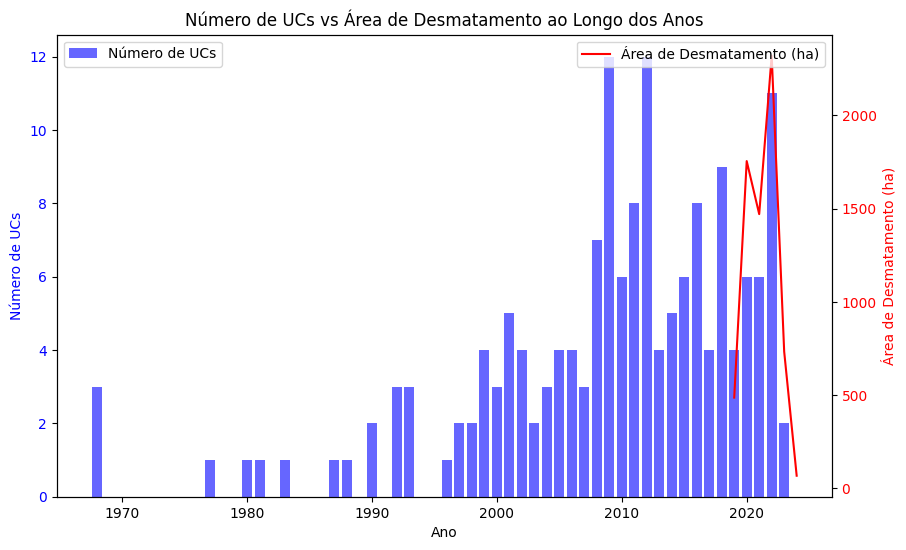

Arquivo salvo em: /content/drive/My Drive/IA M1/Análises de teste/resultados/numero_uc_vs_area_desmatada.csv


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


# Montando o Google Drive
drive.mount('/content/drive')

# Caminho dos arquivos CSV no Google Drive
uc_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/cnuc_2024_apenas_separador_padrao.csv'
alert_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'

# Carregando os arquivos CSV
df_uc = pd.read_csv(uc_file_path)
df_alert = pd.read_csv(alert_file_path)

# Exibindo os primeiros dados das duas tabelas para ver sua estrutura
df_uc.head(), df_alert.head()

# Agrupando os dados das UCs pelo "Ano do ato legal mais recente"
df_uc_grouped = df_uc.groupby('Ano do ato legal mais recente').size().reset_index(name='numero_ucs')

# Agrupando os dados de alertas pelo "detected_year" e somando a área desmatada (area_ha)
df_alert_grouped = df_alert.groupby('detected_year')['area_ha'].sum().reset_index()

# Renomeando colunas para padronizar
df_uc_grouped.columns = ['year', 'numero_ucs']
df_alert_grouped.columns = ['year', 'total_desmatamento_ha']

# Fazendo o merge das duas tabelas com base no ano
df_merged = pd.merge(df_uc_grouped, df_alert_grouped, how='outer', on='year')

# Exibindo os dados combinados
df_merged.head()

######## Plot da análise

# Configurando o gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para o número de UCs
ax1.bar(df_merged['year'], df_merged['numero_ucs'], color='b', alpha=0.6, label='Número de UCs')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Número de UCs', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Gráfico de linha para a área total de desmatamento
ax2 = ax1.twinx()  # Instanciando um segundo eixo
ax2.plot(df_merged['year'], df_merged['total_desmatamento_ha'], color='r', label='Área de Desmatamento (ha)')
ax2.set_ylabel('Área de Desmatamento (ha)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos e legenda
plt.title('Número de UCs vs Área de Desmatamento ao Longo dos Anos')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

###### SALVANDO

# Salvando o arquivo CSV com os dados combinados
output_csv_path = '/content/drive/My Drive/IA M1/Análises de teste/resultados/numero_uc_vs_area_desmatada.csv'
df_merged.to_csv(output_csv_path, index=False)
print(f"Arquivo salvo em: {output_csv_path}")


**1 - Número de alertas anuais**

Anos disponíveis nos alertas: [2019 2020 2021 2022 2023 2024]

Ano: 2019
Contagem de alertas por cidade em 2019:
 city
Mafra                        5
Itaiópolis                   5
Campos Novos                 4
Alfredo Wagner               4
Joinville                    3
Rio Negrinho                 3
Barra Velha                  2
Itapoá                       2
Balneário Arroio do Silva    2
Caçador                      2
São Francisco do Sul         2
Brusque                      2
São Joaquim                  1
Guaramirim                   1
Porto União                  1
Vargem Bonita                1
Paulo Lopes                  1
Concórdia                    1
Água Doce                    1
Criciúma                     1
Ituporanga                   1
Anitápolis                   1
Vitor Meireles               1
Name: count, dtype: int64

Áreas afetadas por cidade em 2019:
                          city  area_ha
0              Alfredo Wagner  13.5988
1                  Anitápol

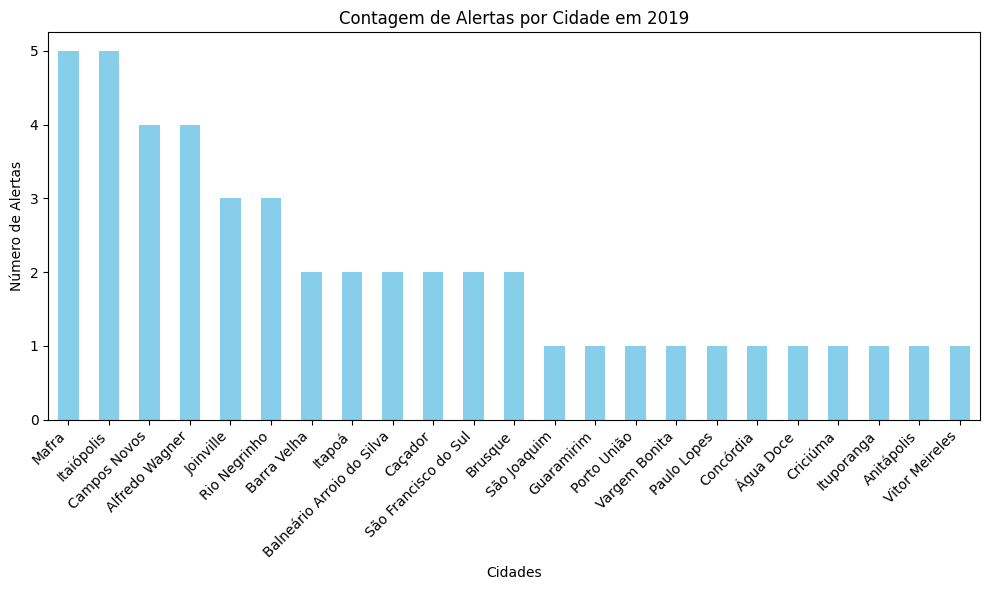

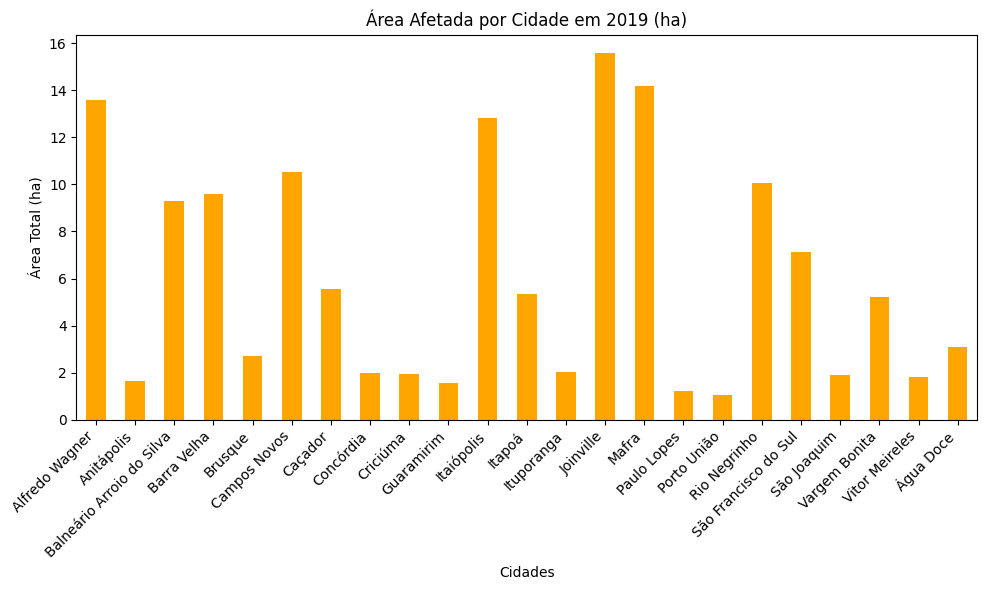


Ano: 2020
Contagem de alertas por cidade em 2020:
 city
Mafra                        14
Itaiópolis                   13
São Francisco do Sul          8
Caçador                       5
Barra Velha                   5
Água Doce                     5
Rio Negrinho                  5
Bom Retiro                    4
Concórdia                     4
Itapoá                        4
Vitor Meireles                4
Palhoça                       3
Urubici                       3
Anitápolis                    3
Alfredo Wagner                3
GRÃO PARÁ                     2
São Joaquim                   2
Porto Belo                    2
Lages                         2
Rancho Queimado               2
Brusque                       2
Ituporanga                    2
Vidal Ramos                   2
Corupá                        2
Campos Novos                  1
Águas Mornas                  1
Bandeirante                   1
Florianópolis                 1
Jaraguá do Sul                1
Itajaí         

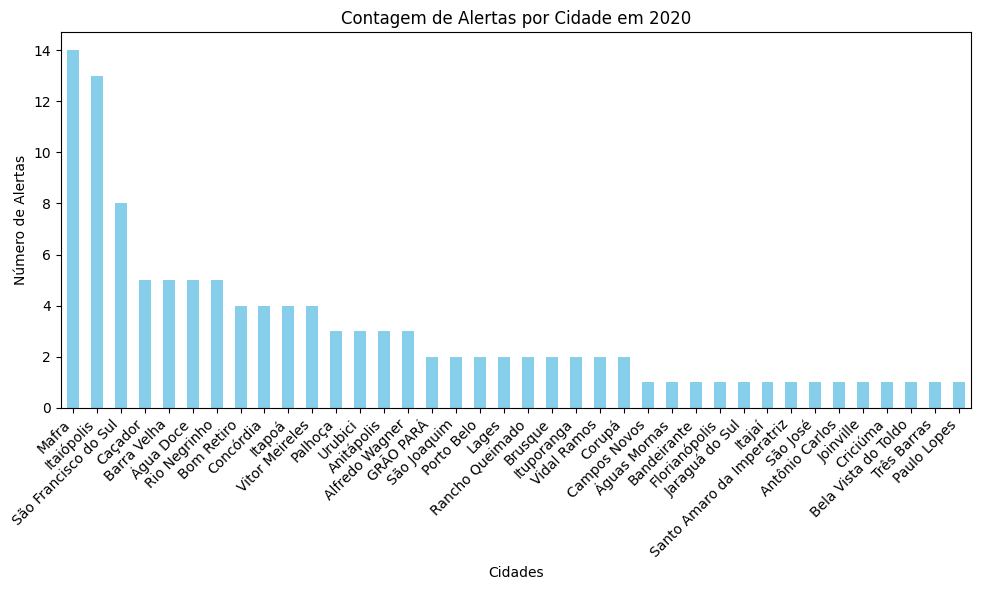

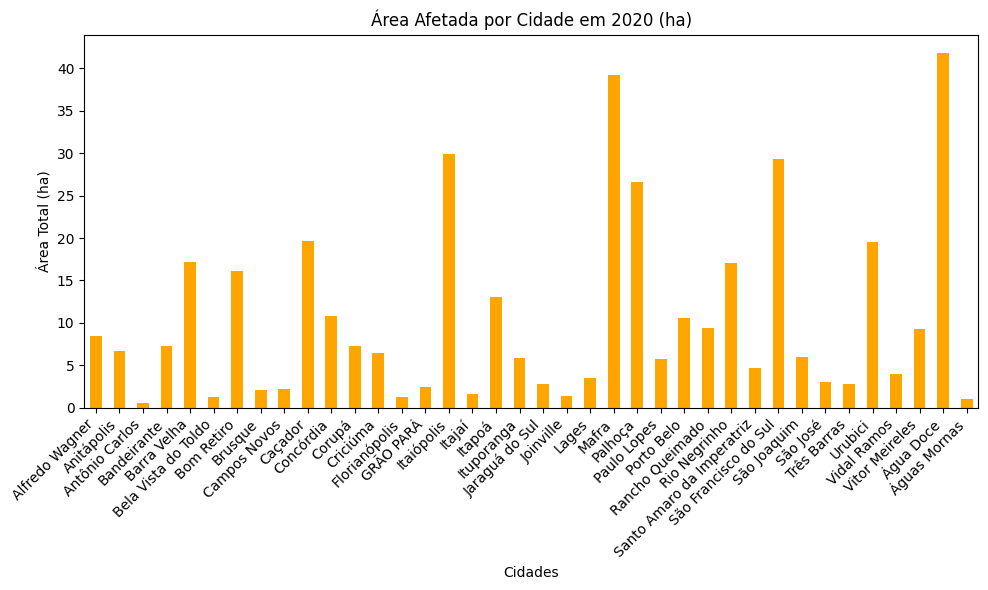


Ano: 2021
Contagem de alertas por cidade em 2021:
 city
Itaiópolis              26
Mafra                   18
Rio Negrinho            13
Bela Vista do Toldo      9
São Francisco do Sul     7
Bom Retiro               7
Itapoá                   6
Brusque                  6
Caçador                  6
Alfredo Wagner           6
Concórdia                6
Vidal Ramos              5
São Joaquim              4
Palhoça                  4
Campos Novos             3
Três Barras              3
Urubici                  2
Rancho Queimado          2
Porto União              2
Criciúma                 2
Joinville                2
Rio do Sul               2
Blumenau                 2
Águas Mornas             2
Videira                  2
Ituporanga               1
Santa Rosa de Lima       1
Itajaí                   1
São Bento do Sul         1
Biguaçu                  1
Água Doce                1
Lages                    1
Navegantes               1
Name: count, dtype: int64

Áreas afetadas por cidade

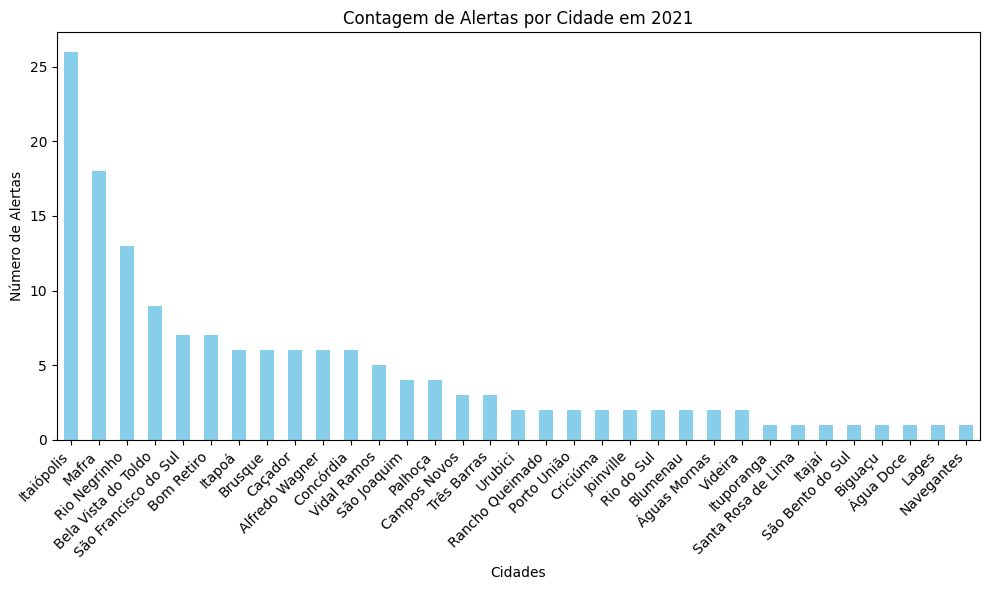

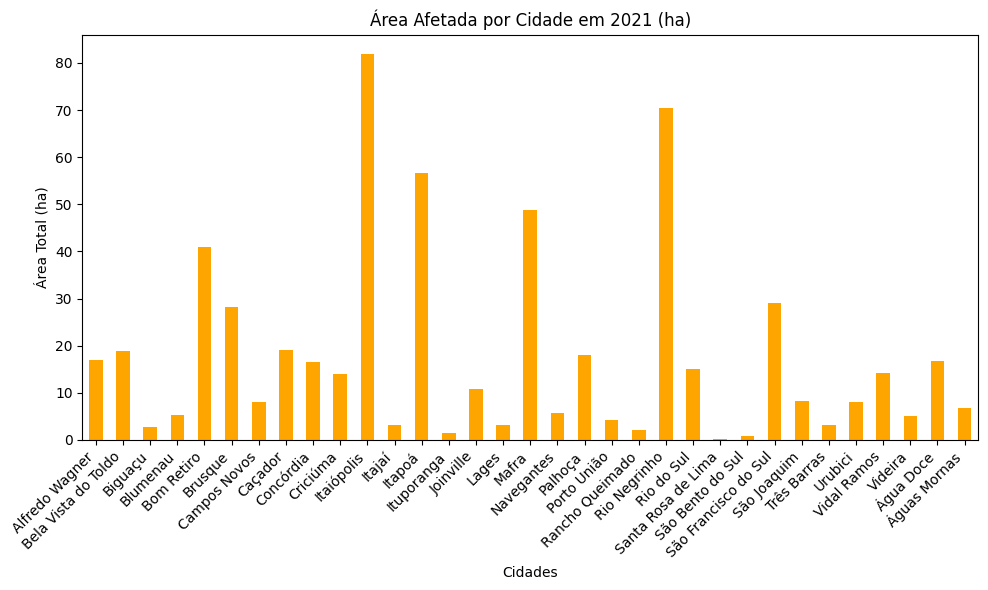


Ano: 2022
Contagem de alertas por cidade em 2022:
 city
Mafra                        29
Concórdia                    28
Itaiópolis                   16
Água Doce                    16
GRÃO PARÁ                    13
Ituporanga                   11
Campos Novos                 11
Leoberto Leal                 9
Alfredo Wagner                8
Vidal Ramos                   8
Águas Mornas                  8
Rio Negrinho                  7
São Joaquim                   7
Anitápolis                    7
Lages                         6
Caçador                       6
Corupá                        4
Vargem Bonita                 4
Itajaí                        4
Vitor Meireles                3
Joinville                     3
Bela Vista do Toldo           3
Criciúma                      3
Rancho Queimado               3
Bom Retiro                    3
Antônio Carlos                2
São Bento do Sul              2
Brusque                       2
Palhoça                       2
Botuverá       

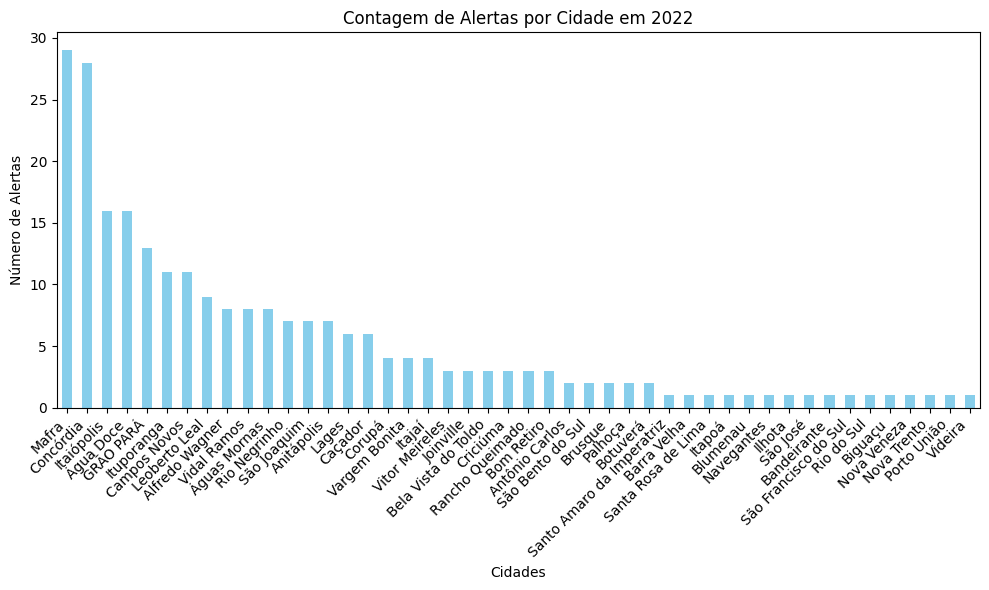

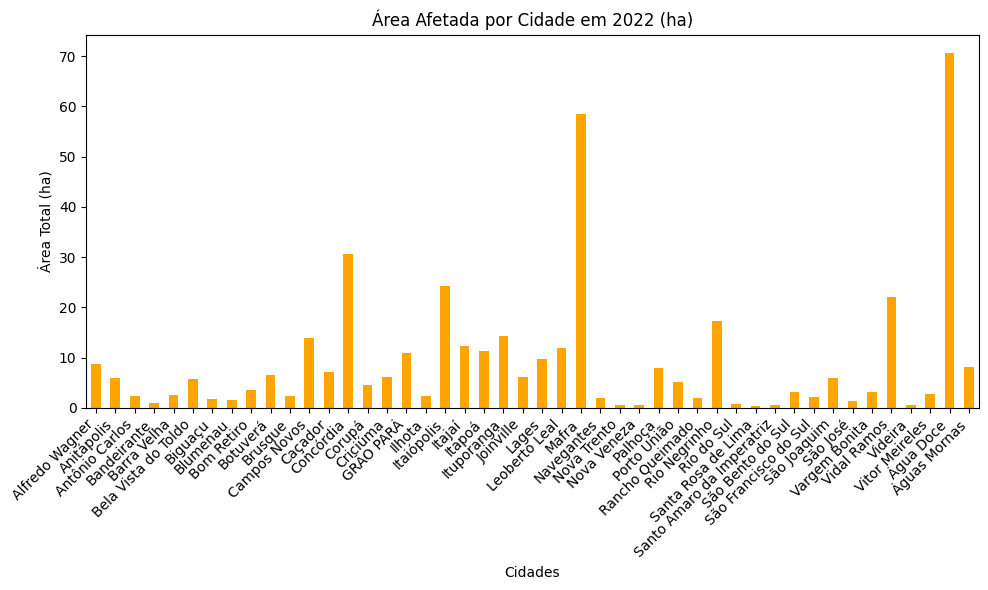


Ano: 2023
Contagem de alertas por cidade em 2023:
 city
Concórdia               13
Itaiópolis               9
Alfredo Wagner           8
Mafra                    8
Lages                    7
Campos Novos             6
Ituporanga               6
Leoberto Leal            6
Caçador                  4
Bom Retiro               4
Águas Mornas             4
GRÃO PARÁ                4
Água Doce                4
Rio Negrinho             3
São Joaquim              3
Vidal Ramos              3
São José                 3
Brusque                  3
Videira                  2
Bela Vista do Toldo      2
Jaraguá do Sul           2
São Bento do Sul         2
Itajaí                   2
Antônio Carlos           2
Criciúma                 2
Anitápolis               2
Blumenau                 2
Porto União              1
Botuverá                 1
Barra Velha              1
Guaramirim               1
Santa Rosa de Lima       1
Itapema                  1
Vargem Bonita            1
São Francisco do Sul     

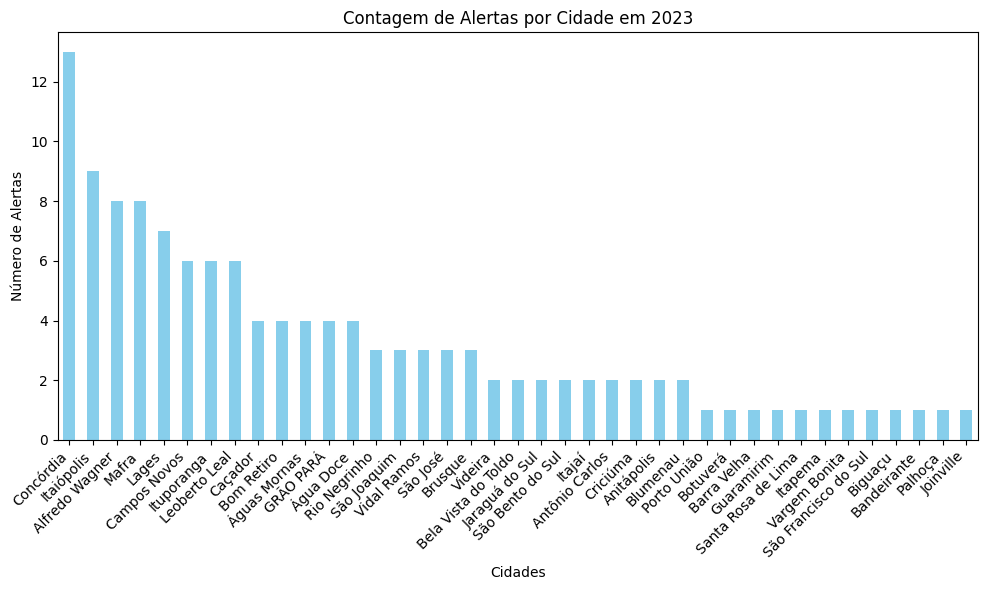

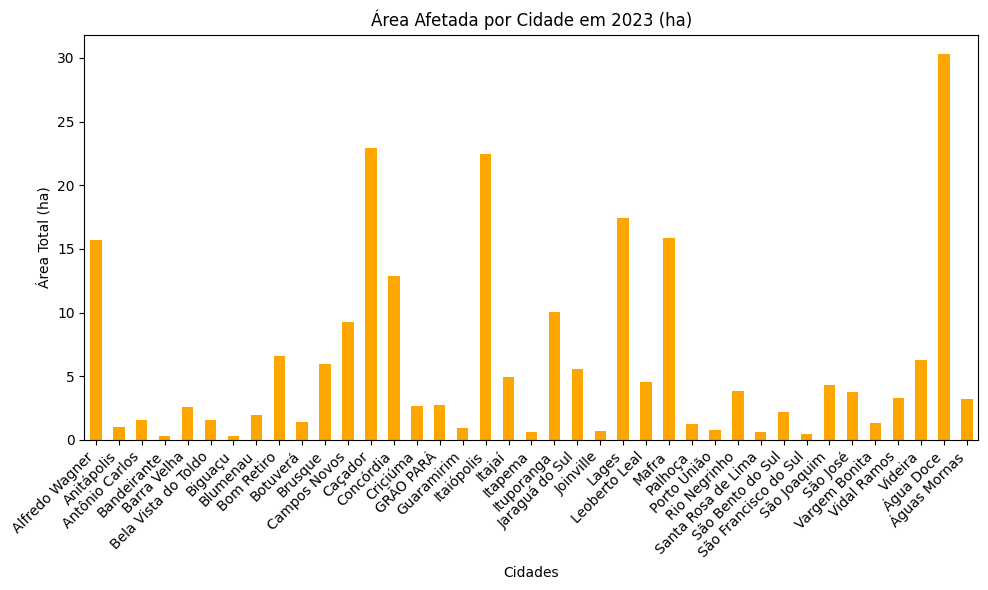


Ano: 2024
Contagem de alertas por cidade em 2024:
 city
Itaiópolis            4
Itajaí                2
Jaraguá do Sul        2
Vidal Ramos           2
Alfredo Wagner        2
Navegantes            1
Ituporanga            1
Bandeirante           1
Bom Retiro            1
Balneário Camboriú    1
Name: count, dtype: int64

Áreas afetadas por cidade em 2024:
                  city  area_ha
0      Alfredo Wagner   2.0353
1  Balneário Camboriú   2.9261
2         Bandeirante   1.1285
3          Bom Retiro   0.8419
4          Itaiópolis   6.4193
5              Itajaí   7.0126
6          Ituporanga   1.0795
7      Jaraguá do Sul   3.4491
8          Navegantes   1.0602
9         Vidal Ramos   3.4303

Estatísticas descritivas das áreas dos alertas em 2024:
 count    17.000000
mean      1.728400
std       1.518151
min       0.321000
25%       0.841900
50%       1.128500
75%       2.245000
max       6.604900
Name: area_ha, dtype: float64


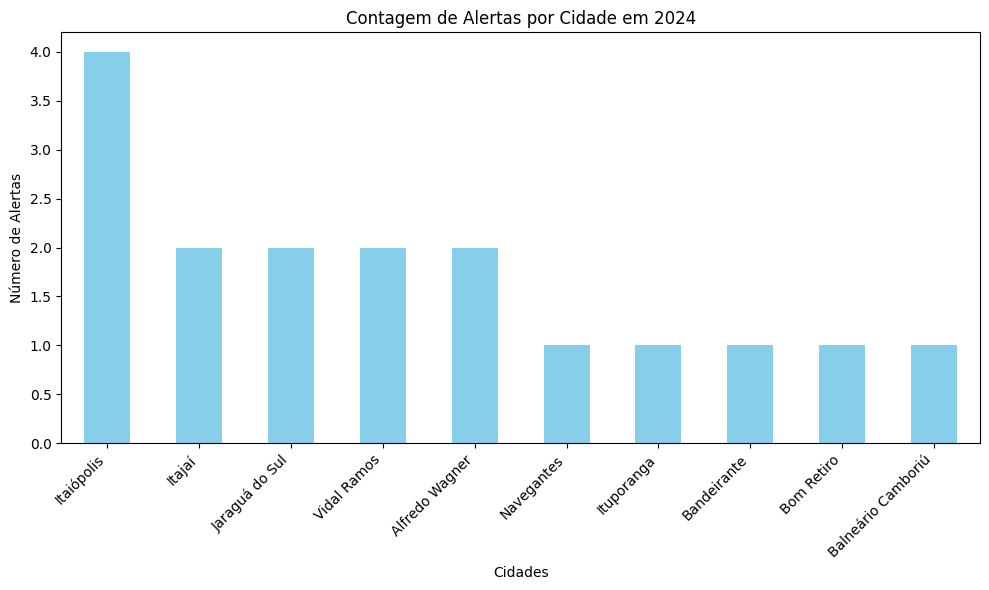

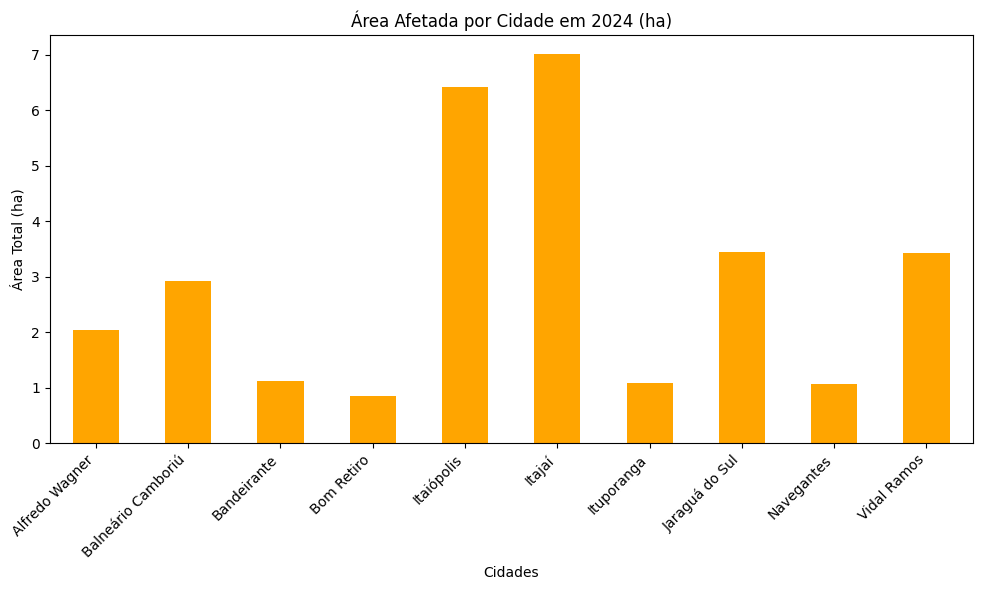

In [ ]:
# 1. Separar os alertas por ano e criar um dicionário para armazenar os dados de cada ano
alertas_por_ano = related_alerts.groupby('detected_year')

# Exibir os anos disponíveis
anos_disponiveis = related_alerts['detected_year'].unique()
print("Anos disponíveis nos alertas:", anos_disponiveis)

# 2. Contagem de alertas por cidade para cada ano
for ano, grupo in alertas_por_ano:
    print(f"\nAno: {ano}")

    # Contagem de alertas por cidade
    alert_count_by_city = grupo['city'].value_counts()
    print(f"Contagem de alertas por cidade em {ano}:\n", alert_count_by_city)

    # Salvando os resultados de contagem de alertas por cidade por ano
    alert_count_by_city.to_csv(f'/content/drive/MyDrive/IA M1/Análises de teste/resultados/contagem_alertas_cidade_{ano}.csv', index=False)

    # Análise de áreas afetadas por cidade para cada ano
    area_by_city = grupo.groupby('city')['area_ha'].sum().reset_index()
    print(f"\nÁreas afetadas por cidade em {ano}:\n", area_by_city)

    # Salvando os resultados de áreas afetadas por cidade por ano
    area_by_city.to_csv(f'/content/drive/MyDrive/IA M1/Análises de teste/resultados/area_alertas_cidade_{ano}.csv', index=False)

    # Estatísticas descritivas das áreas dos alertas para o ano
    area_stats = grupo['area_ha'].describe()
    print(f"\nEstatísticas descritivas das áreas dos alertas em {ano}:\n", area_stats)

    # Gráfico de barras da contagem de alertas por cidade para o ano
    plt.figure(figsize=(10,6))
    alert_count_by_city.plot(kind='bar', color='skyblue')
    plt.title(f'Contagem de Alertas por Cidade em {ano}')
    plt.xlabel('Cidades')
    plt.ylabel('Número de Alertas')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Gráfico de barras das áreas afetadas por cidade para o ano
    plt.figure(figsize=(10,6))
    area_by_city.set_index('city')['area_ha'].plot(kind='bar', color='orange')
    plt.title(f'Área Afetada por Cidade em {ano} (ha)')
    plt.xlabel('Cidades')
    plt.ylabel('Área Total (ha)')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


**(VAI PARA O TRABALHO)1 - CORRELAÇÃO DO NÚMERO DE UCS E ALERTAS POR CIDADE**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Correlação entre o número de UCs e o número de alertas por cidade ao longo dos anos: 0.1543641015585453


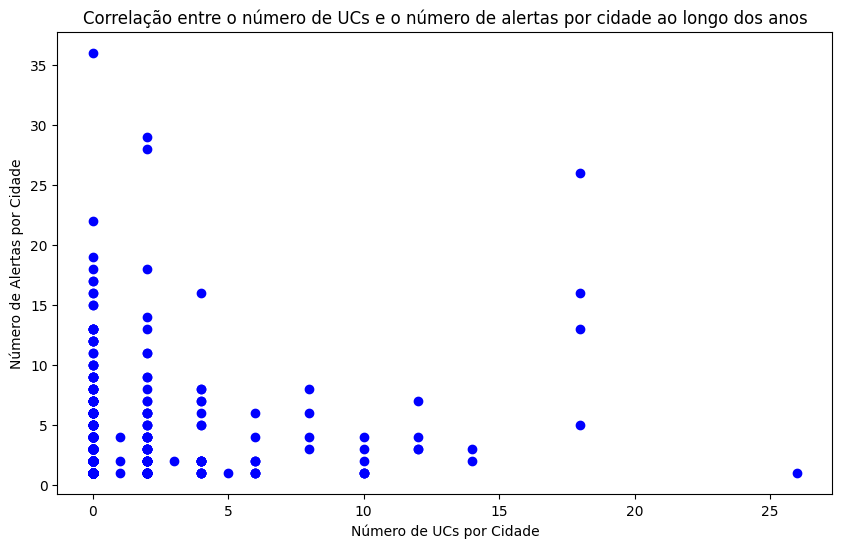

Correlação no ano 2019: 0.26056600819416054


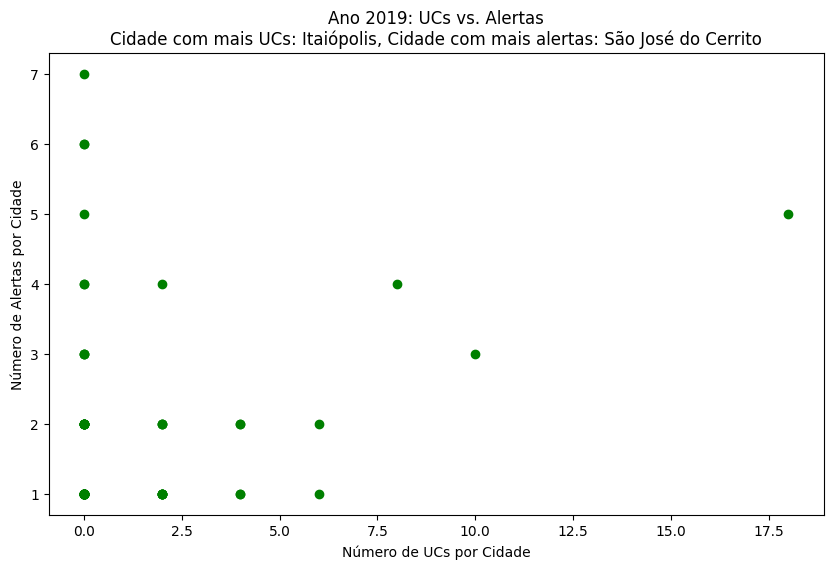

Correlação no ano 2020: 0.0960478434276174


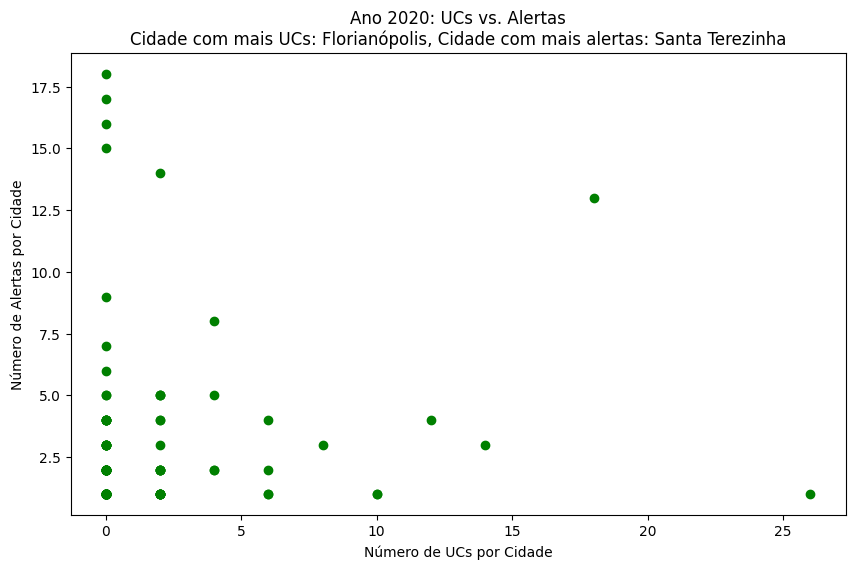

Correlação no ano 2021: 0.3921167003378599


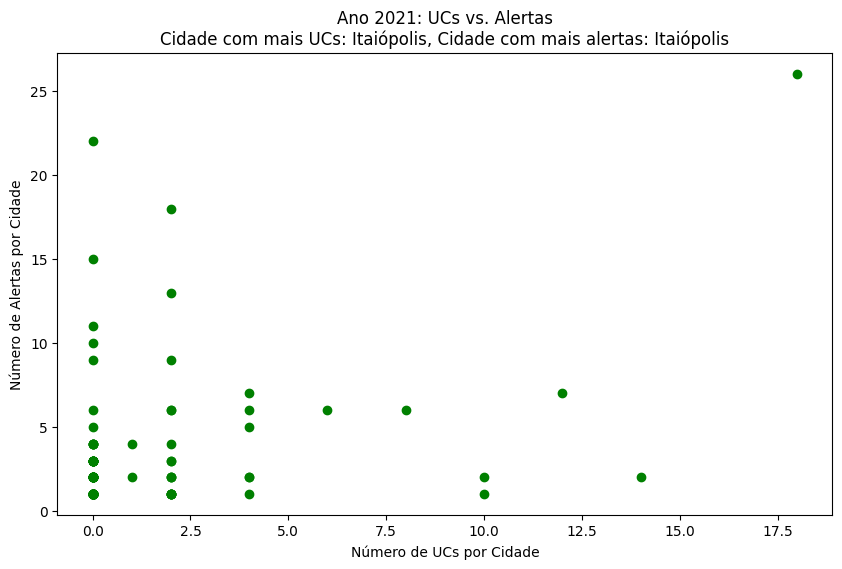

Correlação no ano 2022: 0.08949859554837387


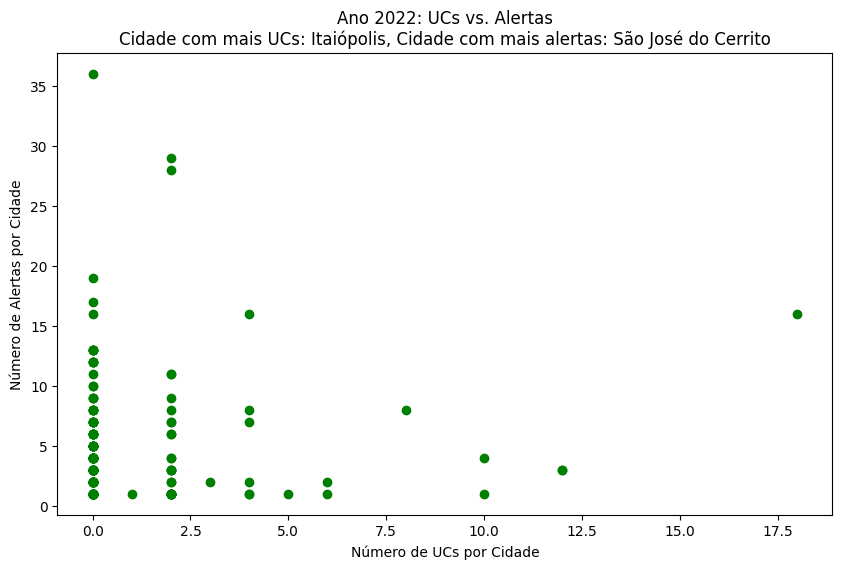

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlação no ano 2023: nan


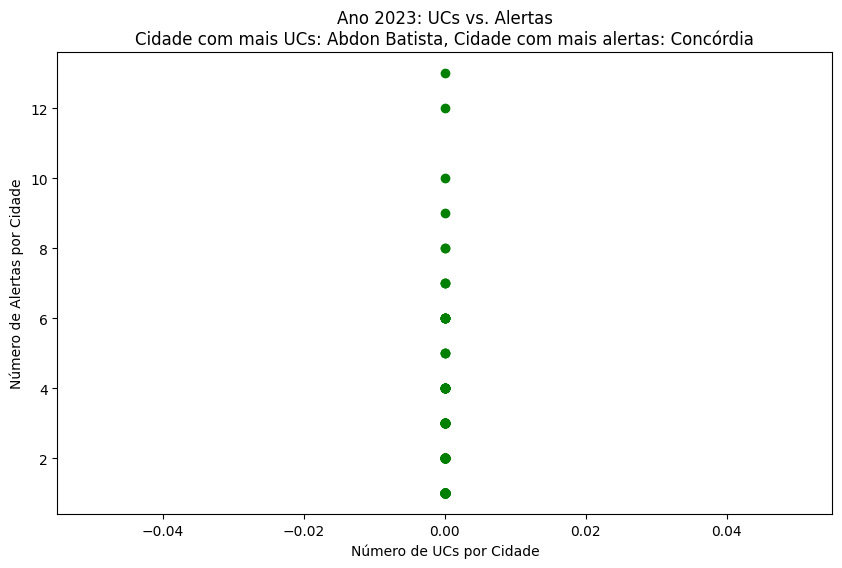

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlação no ano 2024: nan


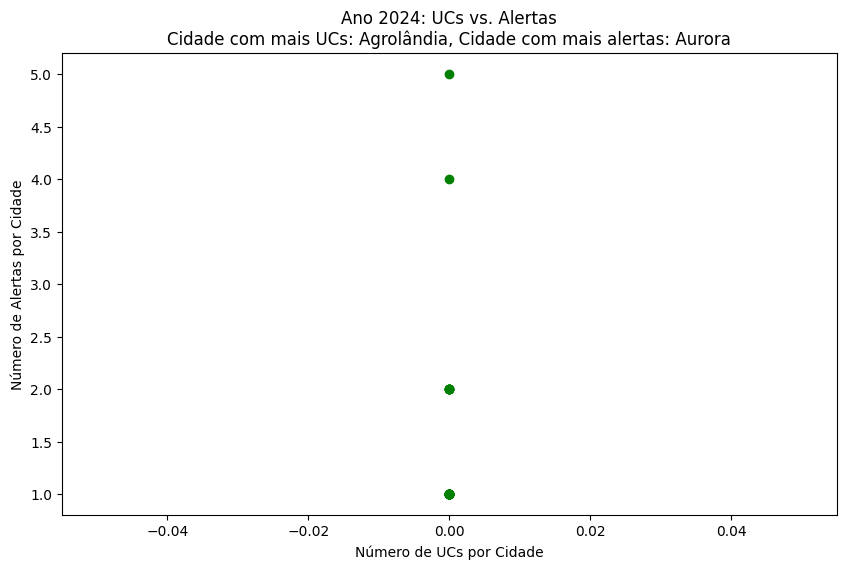

In [ ]:
# Primeiro, monte o Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os arquivos a partir do Google Drive
alert_report_df = pd.read_csv('/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv')
uc_final_df = pd.read_csv('/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv')

# Função para normalizar os nomes das cidades na base de UCs e remover as UCs em mais de uma cidade
def normalize_uc_cities_and_filter(uc_city_str):
    # Remove o estado (SC)
    cidades = uc_city_str.replace('(SC)', '')
    # Verificar se há mais de uma cidade separada por hífen
    if '-' in cidades:
        return None  # Excluir esse dado (retornar None)
    return [city.strip() for city in cidades.split(' - ')]

# Aplicar a função para normalizar os nomes das cidades e filtrar
uc_final_df['Municípios Normalizados'] = uc_final_df['Municípios Abrangidos'].apply(normalize_uc_cities_and_filter)

# Remover as linhas onde o resultado da normalização foi None (ou seja, UCs em mais de uma cidade)
uc_final_df = uc_final_df.dropna(subset=['Municípios Normalizados'])

# Expandir as cidades restantes na base de UCs
ucs_por_cidade_ano = uc_final_df[['Municípios Normalizados', 'Ano']].explode('Municípios Normalizados')
ucs_por_cidade_ano = ucs_por_cidade_ano.rename(columns={'Municípios Normalizados': 'city'})

# Contar o número de UCs por cidade e ano
ucs_count_by_city_ano = ucs_por_cidade_ano.groupby(['city', 'Ano']).size().reset_index(name='uc_count')

# 2. Contar o número de alertas por cidade e por ano
alertas_por_cidade_ano = alert_report_df.groupby(['city', 'detected_year']).size().reset_index(name='alert_count')

# 3. Unir os dados de número de UCs com o número de alertas por cidade e ano
# Unir a contagem de UCs com os alertas por cidade e ano
dados_unidos = pd.merge(alertas_por_cidade_ano, ucs_count_by_city_ano, left_on=['city', 'detected_year'], right_on=['city', 'Ano'], how='left')

# Substituir NaN por 0 para as cidades que não têm UCs naquele ano
dados_unidos['uc_count'].fillna(0, inplace=True)

# 4. Análise da correlação entre o número de UCs e o número de alertas por ano e cidade
correlation = dados_unidos['uc_count'].corr(dados_unidos['alert_count'])
print("Correlação entre o número de UCs e o número de alertas por cidade ao longo dos anos:", correlation)

# 5. Visualizar os dados e a correlação
# Gráfico de dispersão (scatter) mostrando a correlação entre o número de UCs e o número de alertas
plt.figure(figsize=(10,6))
plt.scatter(dados_unidos['uc_count'], dados_unidos['alert_count'], color='blue')
plt.title('Correlação entre o número de UCs e o número de alertas por cidade ao longo dos anos')
plt.xlabel('Número de UCs por Cidade')
plt.ylabel('Número de Alertas por Cidade')
plt.show()

# 6. Estatísticas descritivas para cada ano
for ano in sorted(dados_unidos['detected_year'].unique()):
    dados_por_ano = dados_unidos[dados_unidos['detected_year'] == ano]

    # Encontrar a cidade com mais UCs e mais alertas
    cidade_com_mais_ucs = dados_por_ano.loc[dados_por_ano['uc_count'].idxmax()]['city']
    cidade_com_mais_alertas = dados_por_ano.loc[dados_por_ano['alert_count'].idxmax()]['city']

    correlation_ano = dados_por_ano['uc_count'].corr(dados_por_ano['alert_count'])
    print(f"Correlação no ano {ano}: {correlation_ano}")

    # Gráfico de dispersão por ano com a cidade que tem mais alertas e mais UCs
    plt.figure(figsize=(10,6))
    plt.scatter(dados_por_ano['uc_count'], dados_por_ano['alert_count'], color='green')
    plt.title(f'Ano {ano}: UCs vs. Alertas\nCidade com mais UCs: {cidade_com_mais_ucs}, Cidade com mais alertas: {cidade_com_mais_alertas}')
    plt.xlabel('Número de UCs por Cidade')
    plt.ylabel('Número de Alertas por Cidade')
    plt.show()

# Salvando os resultados no Google Drive
dados_unidos.to_csv('/content/drive/MyDrive/IA M1/Análises de teste/resultados/uc_alertas_correlacao_por_ano.csv', index=False)


**PREPARANDO PARA O WEKA (Não consegui abrir o arquivo no weka)**

In [ ]:
import pandas as pd
import unicodedata
from scipy.io import arff
import os

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Função para remover acentos de uma string
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Carregar o arquivo CSV
file_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'  # Altere para o caminho correto do seu arquivo no Google Drive
df = pd.read_csv(file_path)

# Remover acentos de todas as strings e padronizar valores vazios
df = df.applymap(lambda x: remove_accents(str(x)) if isinstance(x, str) else x)

# Função para detectar o tipo de dado
def detect_type(col):
    if pd.api.types.is_numeric_dtype(col):
        return 'NUMERIC'
    else:
        return 'STRING'

# Converter o DataFrame para o formato ARFF
arff_file_path = '/content/drive/My Drive/IA M1/Análises de teste/weka/uc_report.arff'  # Altere para o caminho onde deseja salvar o ARFF

# Criar o arquivo ARFF
with open(arff_file_path, 'w') as f:
    f.write('@RELATION your_relation_name\n\n')

    # Escrever os atributos com o tipo detectado
    for column in df.columns:
        col_type = detect_type(df[column])
        f.write(f'@ATTRIBUTE {remove_accents(column)} {col_type}\n')

    f.write('\n@DATA\n')

    # Escrever os dados, substituindo NaN por ?
    for index, row in df.iterrows():
        row_data = []
        for x in row:
            if pd.isnull(x):  # Verificar valores vazios
                row_data.append('?')
            else:
                if isinstance(x, str):
                    row_data.append(f'"{remove_accents(str(x))}"')  # Strings com acentos removidos
                else:
                    row_data.append(str(x))  # Números sem aspas
        f.write(','.join(row_data) + '\n')

print(f"Arquivo ARFF salvo no Google Drive em: {arff_file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-27-57baf4ce9202>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: remove_accents(str(x)) if isinstance(x, str) else x)


Arquivo ARFF salvo no Google Drive em: /content/drive/My Drive/IA M1/Análises de teste/weka/uc_report.arff


**(VAI PARA O TRABALHO)JUNÇÃO DE TABELAS**

In [ ]:
# Instalar a biblioteca unidecode
!pip install unidecode

import pandas as pd
import unidecode

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminhos dos arquivos CSV no Google Drive
path_alertas = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
path_ucs = '/content/drive/My Drive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os arquivos CSV
df_alertas = pd.read_csv(path_alertas)
df_ucs = pd.read_csv(path_ucs)

# Visualizar as colunas para confirmar os nomes corretos
print("Colunas em df_alertas:")
print(df_alertas.columns)

print("\nColunas em df_ucs:")
print(df_ucs.columns)

# Remover "(SC)" dos nomes de cidades em "Municípios Abrangidos"
df_ucs['Municípios Abrangidos'] = df_ucs['Municípios Abrangidos'].str.replace(r'\(SC\)', '', regex=True)

# Remover linhas com múltiplas cidades separadas por "-"
df_ucs = df_ucs[~df_ucs['Municípios Abrangidos'].str.contains('-')]

# Padronizar as cidades para letras maiúsculas e sem acento
df_ucs['Municípios Abrangidos'] = df_ucs['Municípios Abrangidos'].apply(lambda x: unidecode.unidecode(x.strip().upper()))
df_alertas['city'] = df_alertas['city'].apply(lambda x: unidecode.unidecode(x.strip().upper()))

# Unificar "Municípios Abrangidos" com "City" e "Ano" com "detected_year"
df_unificado = pd.merge(df_ucs, df_alertas, left_on=['Municípios Abrangidos', 'Ano'], right_on=['city', 'detected_year'], how='inner')

# Preencher valores NaN com 0
df_unificado.fillna(0, inplace=True)

# Exibir o DataFrame unificado (opcional)
print("\nDataFrame Unificado:")
print(df_unificado.head())

# Definir o caminho para salvar o arquivo unificado
output_path = '/content/drive/My Drive/IA M1/Análises de teste/resultados/ucs_alertas_unificado.csv'

# Salvar o DataFrame unificado como um novo arquivo CSV no Google Drive
df_unificado.to_csv(output_path, index=False)

print(f"Arquivo unificado salvo em: {output_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colunas em df_alertas:
Index(['id', 'status', 'status_desc', 'alert_geometry_id', 'alert_code',
       'source', 'detected_year', 'detected_at', 'area_ha', 'biome_id',
       'biome', 'biome_area', 'state_id', 'state', 'state_area', 'city_id',
       'city', 'city_area', 'conservation_unit_id', 'conservation_unit',
       'conservation_unit_area', 'indigenous_land_id', 'indigenous_land',
       'indigenous_land_area', 'quilombo_id', 'quilombo', 'quilombo_area',
       'settlement_id', 'settlement', 'settlement_area', 'watershed_l1_id',
       'watershed_l1', 'watershed_l1_area', 'watershed_l2_id', 'watershed_l2',
       'watershed_l2_area', 'car_count', 'car_area_max', 'car_area_min',
       'car_area_sum', 'car_area_sum_adj', 'legal_reserve_count',
       'legal_reserve_area_max'

In [ ]:
!pip install liac-arff unidecode

import pandas as pd
import arff
import re
from unidecode import unidecode

# Função para remover acentos, mas manter caracteres alfanuméricos e espaços
def clean_string(value):
    if isinstance(value, str):
        # Substituir caracteres acentuados por não acentuados
        value = unidecode(value)
        # Remover quaisquer caracteres especiais, exceto letras, números e espaços
        return re.sub(r'[^a-zA-Z0-9\s]', '', value)
    return value

# Caminho do arquivo CSV no Google Drive
csv_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'  # Altere este caminho conforme necessário

# Carregar o arquivo CSV
df = pd.read_csv(csv_file_path)

# Aplicar a função de limpeza de strings em todas as colunas de objeto (strings)
df_cleaned = df.applymap(clean_string)

# Remover valores nulos, se necessário
df_cleaned = df_cleaned.dropna()

# Converter o DataFrame para lista de tuplas e definir os atributos
arff_data = {
    'description': 'Unidades de Conservação e Alertas',
    'relation': 'ucs_alertas',
    'attributes': [(col, 'STRING') if df_cleaned[col].dtype == 'object' else (col, 'NUMERIC') for col in df_cleaned.columns],
    'data': df_cleaned.values.tolist()
}

# Caminho para salvar o arquivo ARFF no Google Drive
arff_file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado_cleaned.arff'  # Altere este caminho conforme necessário

# Salvar como ARFF
with open(arff_file_path, 'w') as f:
    arff.dump(arff_data, f)

print(f'Arquivo ARFF salvo em: {arff_file_path}')


<ipython-input-61-f87257ccec8b>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df.applymap(clean_string)


Arquivo ARFF salvo em: /content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado_cleaned.arff


**(VAI PARA O TRABALHO)Quantidade de alertas de acordo com esfera administrativa**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


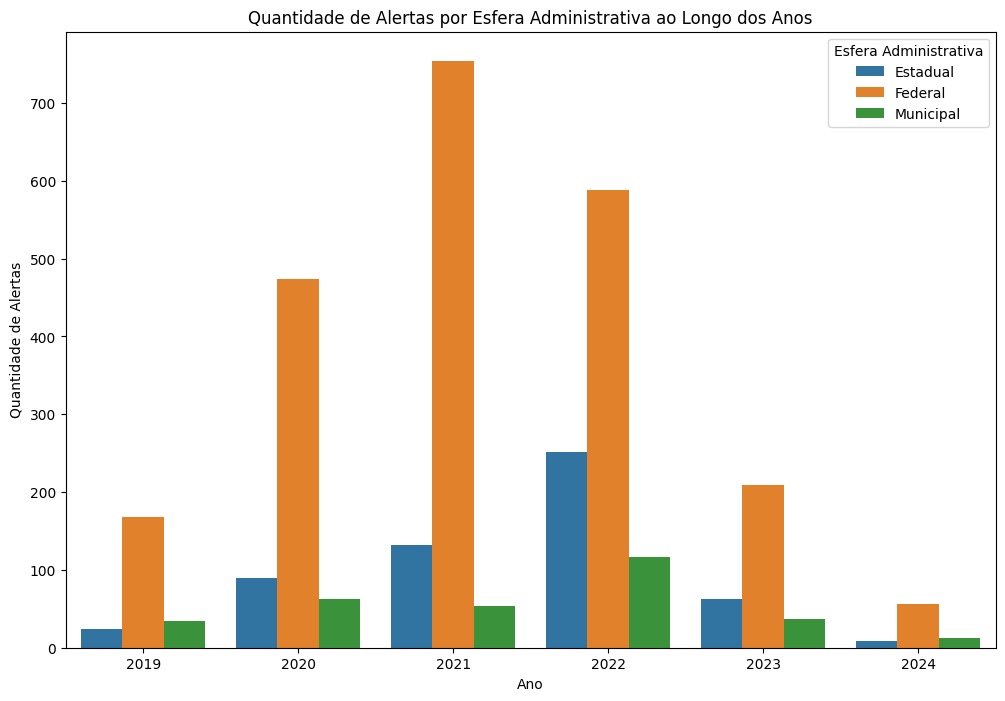

In [ ]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV
file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'
df = pd.read_csv(file_path)

# Exibir as primeiras linhas para conferir os dados
df.head()

# Agrupar por Esfera Administrativa e Ano, contando a quantidade de alertas (alert_code)
df_grouped = df.groupby(['Esfera Administrativa', 'detected_year'])['alert_code'].count().reset_index()

# Renomear a coluna com a contagem de alertas
df_grouped.rename(columns={'alert_code': 'Quantidade de Alertas'}, inplace=True)

# Exibir o resultado
df_grouped.head()

# Visualizar os dados por meio de um gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='detected_year', y='Quantidade de Alertas', hue='Esfera Administrativa', data=df_grouped)
plt.title('Quantidade de Alertas por Esfera Administrativa ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Alertas')
plt.legend(title='Esfera Administrativa')
plt.show()


**(VAI PARA O TRABALHO, MAS COMO TENTATIVA QUE NÃO FUNCIONOU)Previsão**

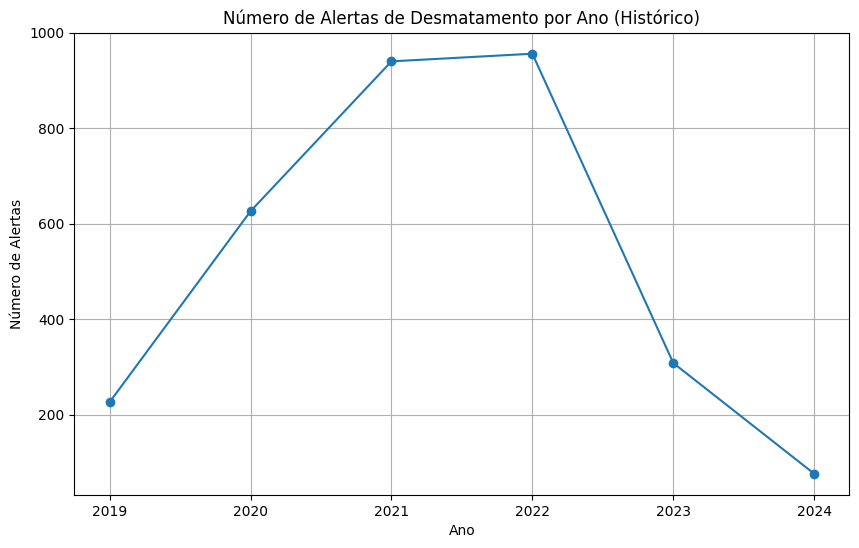

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


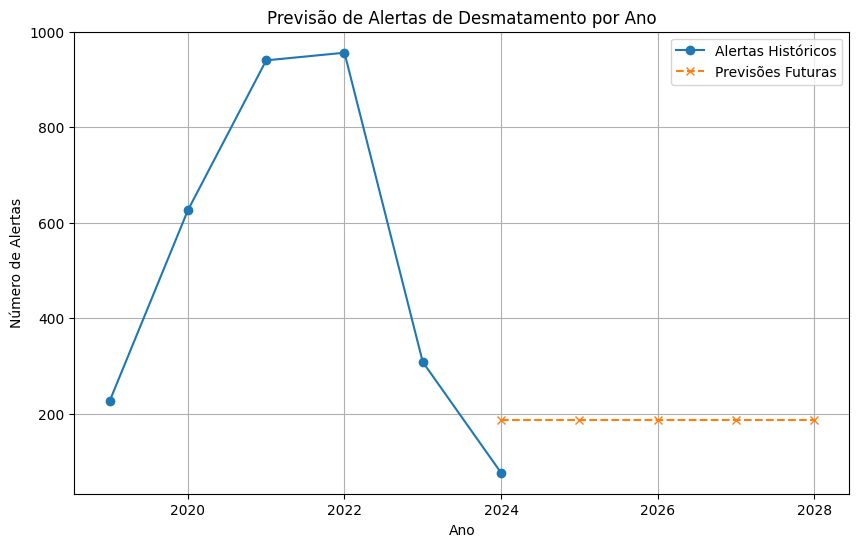

R² Score: -5.6301798399999985


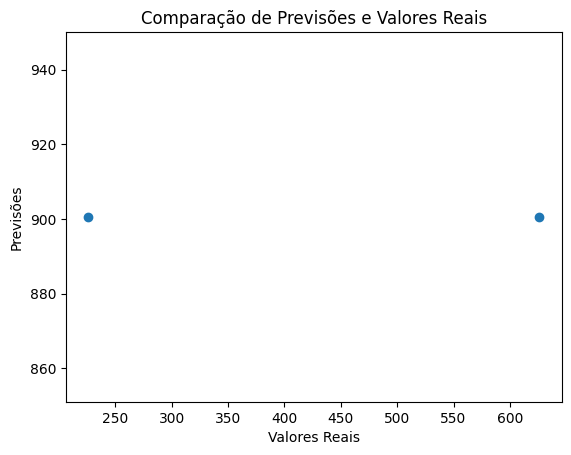

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do Google Drive
file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'  # Mude o caminho conforme necessário
df = pd.read_csv(file_path)

# Verificar se a coluna detected_year está presente
if 'detected_year' in df.columns:
    df['Ano'] = df['detected_year']
else:
    raise ValueError("A coluna 'detected_year' não foi encontrada no dataset. Verifique o nome da coluna.")

# Contar o número de alertas (alert_code) por ano
df_alertas_por_ano = df.groupby('Ano')['alert_code'].count().reset_index()

# Plotar os dados históricos para verificar a distribuição
plt.figure(figsize=(10, 6))
plt.plot(df_alertas_por_ano['Ano'], df_alertas_por_ano['alert_code'], marker='o')
plt.xlabel("Ano")
plt.ylabel("Número de Alertas")
plt.title("Número de Alertas de Desmatamento por Ano (Histórico)")
plt.grid(True)
plt.show()

# Definir as variáveis de entrada (anos) e a variável alvo (número de alertas)
X = df_alertas_por_ano[['Ano']]
y = df_alertas_por_ano['alert_code']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Floresta Aleatória
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões para os anos seguintes
anos_futuros = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
alertas_futuros = model.predict(anos_futuros)

# Garantir que as previsões não sejam negativas
alertas_futuros = np.maximum(alertas_futuros, 0)

# Gerar o gráfico com os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df_alertas_por_ano['Ano'], df_alertas_por_ano['alert_code'], label="Alertas Históricos", marker='o')
plt.plot(anos_futuros, alertas_futuros, label="Previsões Futuras", linestyle='--', marker='x')
plt.xlabel("Ano")
plt.ylabel("Número de Alertas")
plt.title("Previsão de Alertas de Desmatamento por Ano")
plt.legend()
plt.grid(True)
plt.show()

# Avaliar o modelo nos dados históricos
y_pred = model.predict(X_test)
print("R² Score:", model.score(X_test, y_test))

# Visualizar os resultados das previsões com os dados de teste
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Comparação de Previsões e Valores Reais")
plt.show()


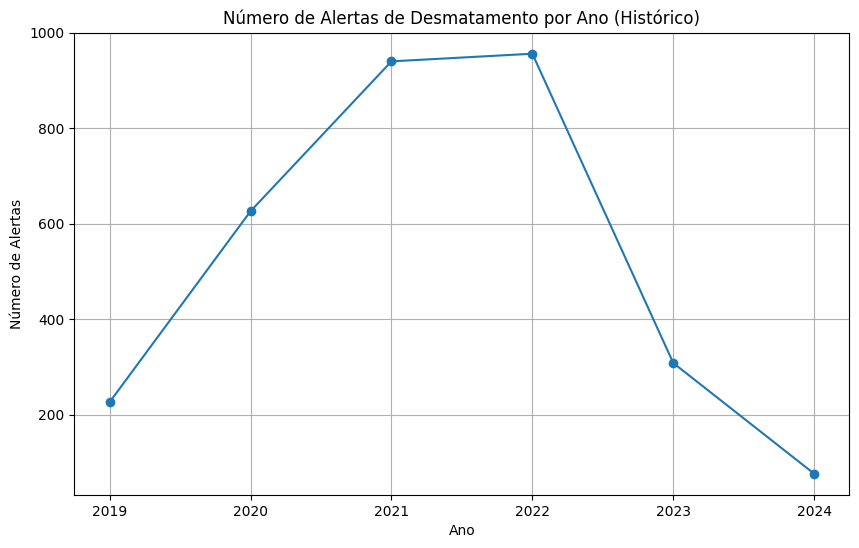

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


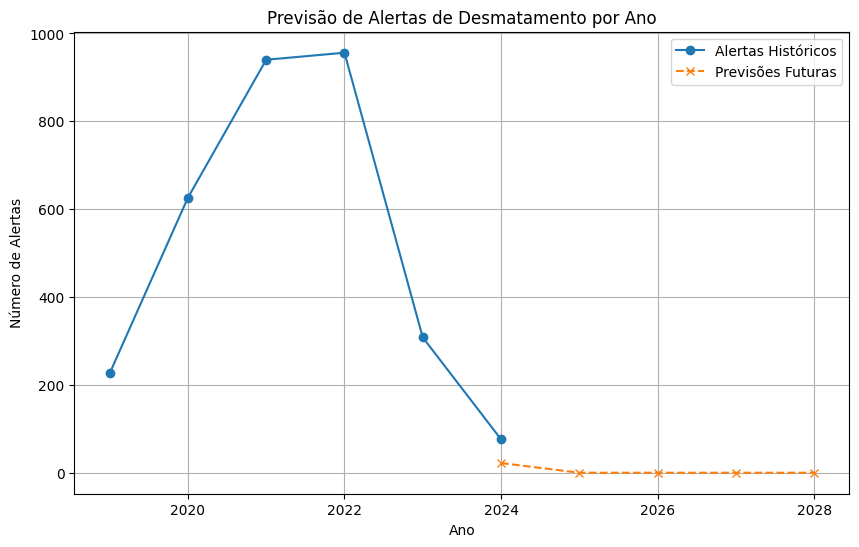

R² Score: -9.384399961552024


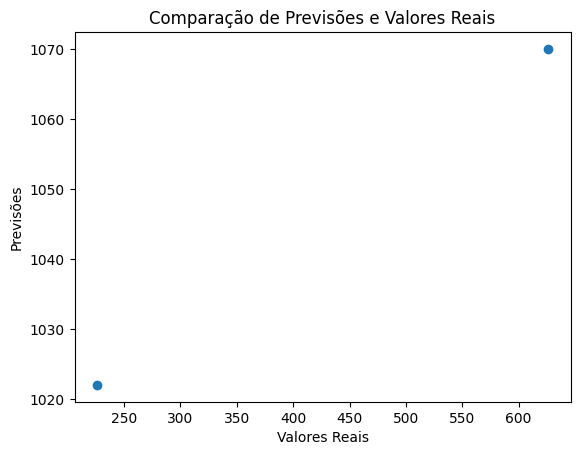

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados do Google Drive
file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'  # Mude o caminho conforme necessário
df = pd.read_csv(file_path)

# Verificar se a coluna detected_year está presente
if 'detected_year' in df.columns:
    df['Ano'] = df['detected_year']
else:
    raise ValueError("A coluna 'detected_year' não foi encontrada no dataset. Verifique o nome da coluna.")

# Contar o número de alertas (alert_code) por ano
df_alertas_por_ano = df.groupby('Ano')['alert_code'].count().reset_index()

# Plotar os dados históricos para verificar a distribuição
plt.figure(figsize=(10, 6))
plt.plot(df_alertas_por_ano['Ano'], df_alertas_por_ano['alert_code'], marker='o')
plt.xlabel("Ano")
plt.ylabel("Número de Alertas")
plt.title("Número de Alertas de Desmatamento por Ano (Histórico)")
plt.grid(True)
plt.show()

# Definir as variáveis de entrada (anos) e a variável alvo (número de alertas)
X = df_alertas_por_ano[['Ano']]
y = df_alertas_por_ano['alert_code']

# Aplicar transformação polinomial de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de Regressão Linear com os dados polinomiais
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os anos seguintes com transformação polinomial
anos_futuros = np.array([2024, 2025, 2026, 2027, 2028]).reshape(-1, 1)
anos_futuros_poly = poly.transform(anos_futuros)
alertas_futuros = model.predict(anos_futuros_poly)

# Garantir que as previsões não sejam negativas
alertas_futuros = np.maximum(alertas_futuros, 0)

# Gerar o gráfico com os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df_alertas_por_ano['Ano'], df_alertas_por_ano['alert_code'], label="Alertas Históricos", marker='o')
plt.plot(anos_futuros, alertas_futuros, label="Previsões Futuras", linestyle='--', marker='x')
plt.xlabel("Ano")
plt.ylabel("Número de Alertas")
plt.title("Previsão de Alertas de Desmatamento por Ano")
plt.legend()
plt.grid(True)
plt.show()

# Avaliar o modelo nos dados históricos
y_pred = model.predict(X_test)
print("R² Score:", model.score(X_test, y_test))

# Visualizar os resultados das previsões com os dados de teste
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Comparação de Previsões e Valores Reais")
plt.show()


**(VAI PARA O TRABALHO)Desmatamento e Biosfera**

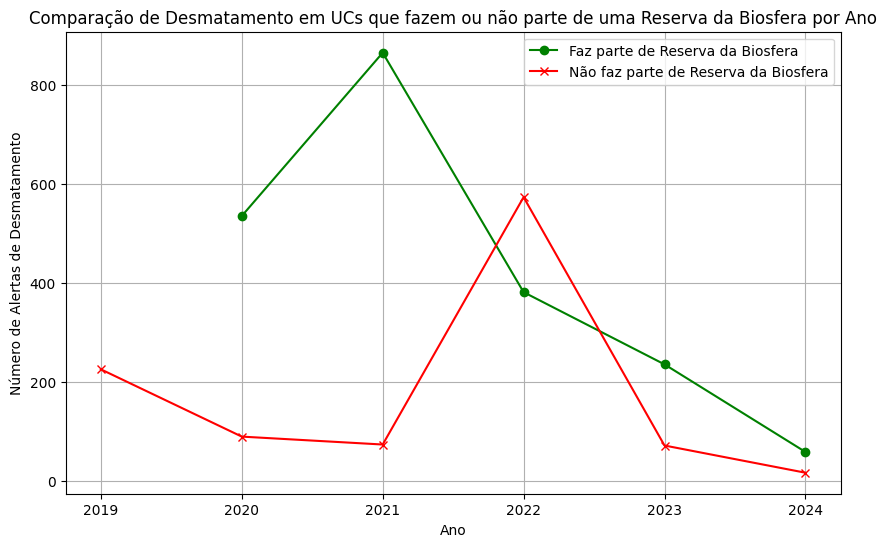

    detected_year faz_parte_reserva  alert_code
0            2019               Não         226
1            2020               Não          90
2            2020               Sim         536
3            2021               Não          74
4            2021               Sim         866
5            2022               Não         574
6            2022               Sim         382
7            2023               Não          72
8            2023               Sim         236
9            2024               Não          17
10           2024               Sim          59


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do Google Drive
file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'  # Atualize o caminho conforme necessário
df = pd.read_csv(file_path)

# Verificar se as colunas 'Reserva da Biosfera' e 'detected_year' existem
if 'Reserva da Biosfera' not in df.columns or 'detected_year' not in df.columns:
    raise ValueError("As colunas 'Reserva da Biosfera' e/ou 'detected_year' não foram encontradas. Verifique a estrutura do arquivo.")

# Criar uma coluna 'faz_parte_reserva' para indicar se a UC faz parte de uma reserva da biosfera
df['faz_parte_reserva'] = df['Reserva da Biosfera'].apply(lambda x: 'Sim' if pd.notnull(x) and x != '0' else 'Não')

# Agrupar por ano e por 'faz_parte_reserva', contando o número de alertas de desmatamento
df_comparacao_ano = df.groupby(['detected_year', 'faz_parte_reserva'])['alert_code'].count().reset_index()

# Separar os dados para UCs que fazem parte e UCs que não fazem parte de uma reserva da biosfera
df_sim = df_comparacao_ano[df_comparacao_ano['faz_parte_reserva'] == 'Sim']
df_nao = df_comparacao_ano[df_comparacao_ano['faz_parte_reserva'] == 'Não']

# Plotar o gráfico comparando as UCs que fazem parte ou não de uma reserva da biosfera por ano
plt.figure(figsize=(10, 6))
plt.plot(df_sim['detected_year'], df_sim['alert_code'], label="Faz parte de Reserva da Biosfera", marker='o', color='green')
plt.plot(df_nao['detected_year'], df_nao['alert_code'], label="Não faz parte de Reserva da Biosfera", marker='x', color='red')
plt.xlabel("Ano")
plt.ylabel("Número de Alertas de Desmatamento")
plt.title("Comparação de Desmatamento em UCs que fazem ou não parte de uma Reserva da Biosfera por Ano")
plt.legend()
plt.grid(True)
plt.show()

# Exibir os dados comparativos
print(df_comparacao_ano)


**(VAI PARA O TRABALHO)Usando Kmeans**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


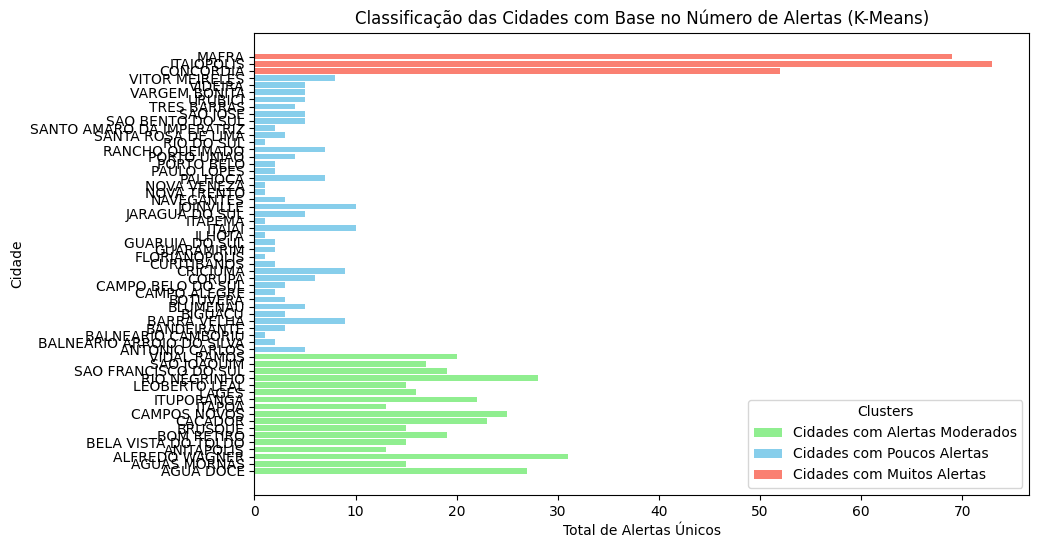

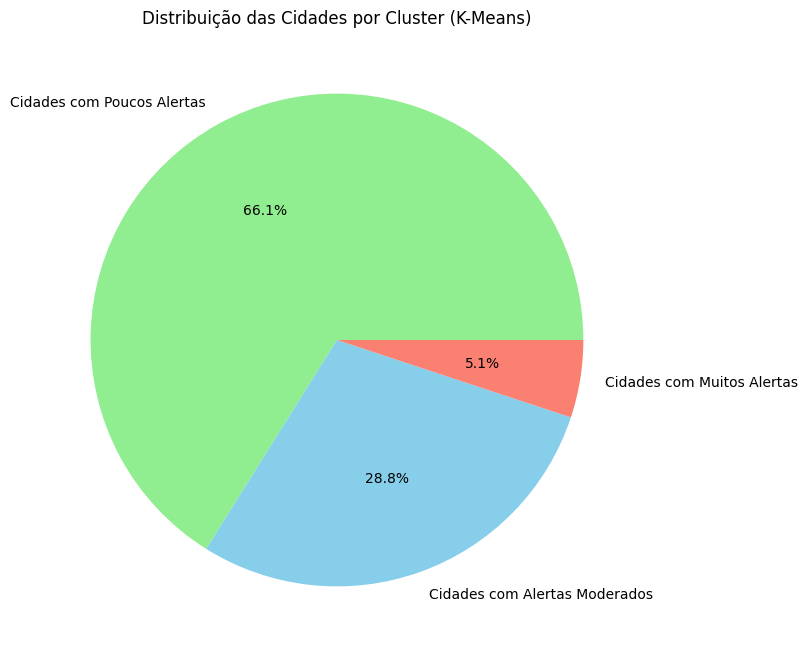

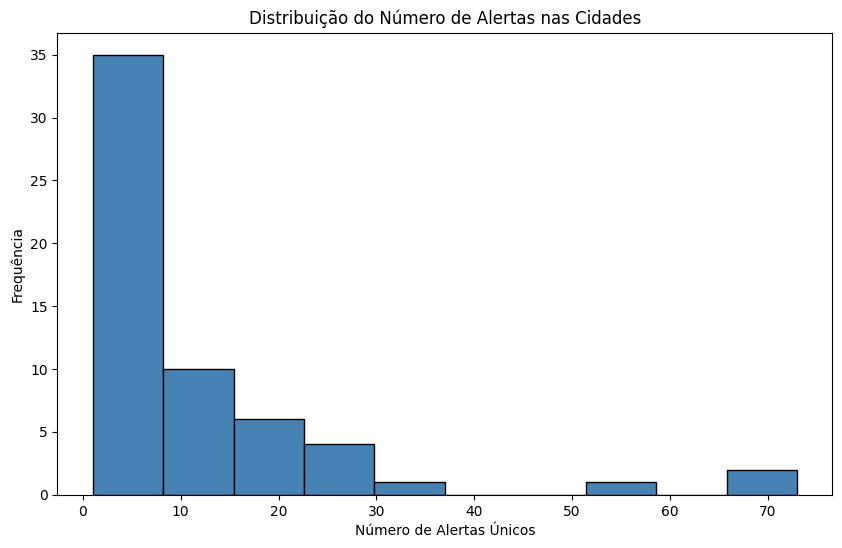

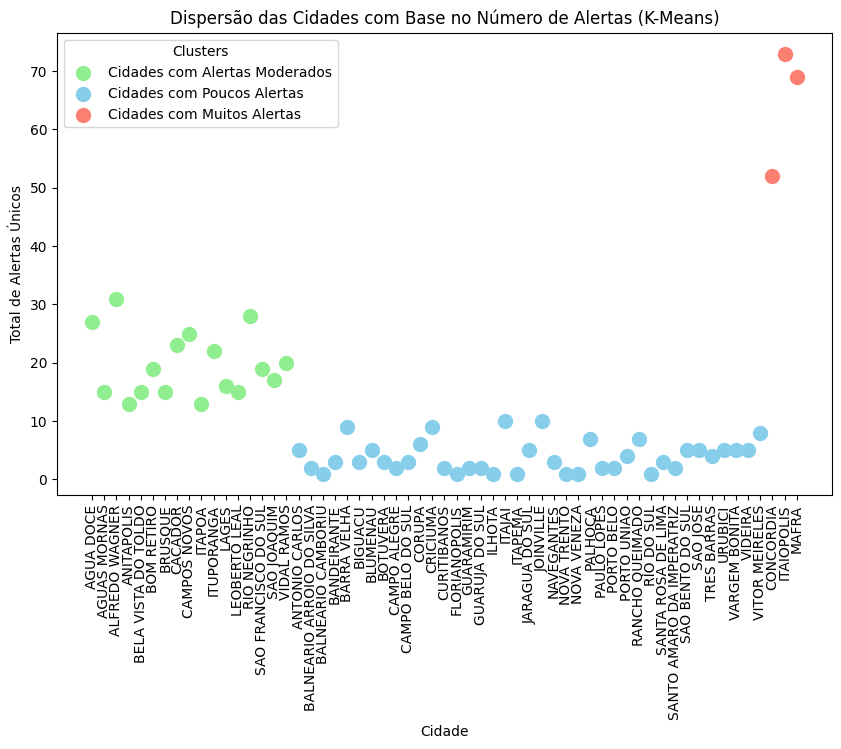

In [ ]:
# Importar bibliotecas necessárias
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Montar o Google Drive (se você estiver usando Google Colab)
drive.mount('/content/drive')

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/My Drive/IA M1/Análises de teste/dados_unificados/ucs_alertas_unificado.csv'

# Leitura do arquivo CSV
df = pd.read_csv(file_path)

# Verificar se a coluna 'alert_code' está presente
if 'alert_code' in df.columns and 'city' in df.columns:
    # Agrupar os dados por cidade e contar alertas únicos (usando alert_code)
    city_alerts = df.groupby('city')['alert_code'].nunique().reset_index()

    # Renomear as colunas para facilitar a visualização
    city_alerts.columns = ['Cidade', 'Total_Alertas']

    # Aplicar K-Means para classificar as cidades com base no número de alertas
    kmeans = KMeans(n_clusters=3, random_state=42)
    city_alerts['Cluster'] = kmeans.fit_predict(city_alerts[['Total_Alertas']])

    # Ajustar as descrições dos clusters
    cluster_names = {0: 'Cidades com Poucos Alertas',
                     1: 'Cidades com Muitos Alertas',
                     2: 'Cidades com Alertas Moderados'}

    city_alerts['Cluster_Descr'] = city_alerts['Cluster'].map(cluster_names)

    # Cores corrigidas: 'Cidades com Muitos Alertas' agora é 'salmon' e 'Cidades com Alertas Moderados' é 'lightgreen'
    colors = {'Cidades com Poucos Alertas': 'skyblue',
              'Cidades com Alertas Moderados': 'lightgreen',
              'Cidades com Muitos Alertas': 'salmon'}

    # Gráfico de Barras corrigido
    plt.figure(figsize=(10, 6))
    for cluster in city_alerts['Cluster_Descr'].unique():
        clustered_cities = city_alerts[city_alerts['Cluster_Descr'] == cluster]
        plt.barh(clustered_cities['Cidade'], clustered_cities['Total_Alertas'],
                 color=colors[cluster], label=cluster)

    plt.xlabel('Total de Alertas Únicos')
    plt.ylabel('Cidade')
    plt.title('Classificação das Cidades com Base no Número de Alertas (K-Means)')
    plt.legend(title='Clusters')
    plt.show()

    # Gráfico de Pizza (Pie Chart) para a distribuição de cidades por cluster
    plt.figure(figsize=(8, 8))
    city_alerts['Cluster_Descr'].value_counts().plot.pie(autopct='%1.1f%%',
                                                         colors=[colors[c] for c in city_alerts['Cluster_Descr'].unique()])
    plt.title('Distribuição das Cidades por Cluster (K-Means)')
    plt.ylabel('')
    plt.show()

    # Histograma para a distribuição do número de alertas nas cidades
    plt.figure(figsize=(10, 6))
    plt.hist(city_alerts['Total_Alertas'], bins=10, color='steelblue', edgecolor='black')
    plt.title('Distribuição do Número de Alertas nas Cidades')
    plt.xlabel('Número de Alertas Únicos')
    plt.ylabel('Frequência')
    plt.show()

    # Gráfico de Dispersão (Scatter Plot) para visualização dos alertas por cluster
    plt.figure(figsize=(10, 6))
    for cluster in city_alerts['Cluster_Descr'].unique():
        clustered_cities = city_alerts[city_alerts['Cluster_Descr'] == cluster]
        plt.scatter(clustered_cities['Cidade'], clustered_cities['Total_Alertas'],
                    color=colors[cluster], label=cluster, s=100)

    plt.xlabel('Cidade')
    plt.ylabel('Total de Alertas Únicos')
    plt.title('Dispersão das Cidades com Base no Número de Alertas (K-Means)')
    plt.xticks(rotation=90)
    plt.legend(title='Clusters')
    plt.show()

else:
    print("Colunas 'city' e/ou 'alert_code' não encontradas no arquivo. Verifique o nome das colunas e ajuste o código.")


**(NOVO) Ciclo de tratamento Correlação**

In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)
df_uc = pd.read_csv(uc_path)

# Ajustar as colunas de data para garantir que estejam no mesmo formato
df_alertas['detected_year'] = pd.to_datetime(df_alertas['detected_year'], format='%Y').dt.year
df_uc['Ano'] = pd.to_datetime(df_uc['Ano'], format='%Y').dt.year

# Agrupar os alertas por cidade e ano, somando o número de alertas por ano por cidade
alertas_por_cidade_ano = df_alertas.dropna(subset=['city']).groupby(['city', 'detected_year']).size().reset_index(name='total_alertas')

# Mesclar essa soma de alertas de volta ao DataFrame original de alertas
df_alertas = pd.merge(df_alertas, alertas_por_cidade_ano, on=['city', 'detected_year'], how='left')

# Função para realizar o pré-tratamento do DataFrame
def preprocess_dataframe(df):
    # Substituir valores nulos por 0, pois removê-los pode causar perda de informações
    df_filled = df.fillna(0)

    # Remover colunas onde todos os valores são iguais
    df_filled = df_filled.loc[:, df_filled.apply(lambda col: col.nunique() > 1)]

    # Manter apenas colunas numéricas
    df_numeric = df_filled.select_dtypes(include=['float64', 'int64'])

    return df_numeric

# Pré-processar os DataFrames de alertas e unidades de conservação
df_alertas_clean = preprocess_dataframe(df_alertas)
df_uc_clean = preprocess_dataframe(df_uc)

# Função corrigida para remover colunas altamente correlacionadas (redundantes)
def remove_redundant_columns(df, threshold=0.99):
    corr_matrix = df.corr().abs()  # Matriz de correlação absoluta
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Triângulo superior da matriz
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] >= threshold)]
    df_reduced = df.drop(columns=to_drop)  # Remover as colunas redundantes
    return df_reduced, to_drop

# Remover colunas redundantes da tabela de alertas
df_alertas_clean_reduced, dropped_alertas_columns = remove_redundant_columns(df_alertas_clean)
print(f"Colunas removidas da tabela de alertas por redundância: {dropped_alertas_columns}")

# Remover colunas redundantes da tabela de unidades de conservação
df_uc_clean_reduced, dropped_uc_columns = remove_redundant_columns(df_uc_clean)
print(f"Colunas removidas da tabela de unidades de conservação por redundância: {dropped_uc_columns}")

# Verificar as colunas restantes após a remoção de redundâncias
print("\nColunas restantes na tabela de alertas (sem redundâncias):")
print(df_alertas_clean_reduced.columns)

print("\nColunas restantes na tabela de unidades de conservação (sem redundâncias):")
print(df_uc_clean_reduced.columns)

# Função para encontrar correlações entre duas tabelas, separando fortes e fracas
def find_strong_and_weak_correlations(df1, df2, min_corr=0.7):
    strong_correlations = []
    weak_correlations_count = 0

    # Pegar todas as combinações de colunas entre df1 e df2
    for col1 in df1.columns:
        for col2 in df2.columns:
            # Tentar calcular a correlação, evitando warnings com NaN ou divisão por zero
            try:
                corr_value = df1[col1].corr(df2[col2])  # Pega a correlação entre as colunas de df1 e df2
                if np.isnan(corr_value):
                    continue  # Pular se for NaN
                # Verificar se a correlação é forte ou fraca
                if abs(corr_value) >= min_corr:
                    strong_correlations.append((col1, col2, corr_value))
                else:
                    weak_correlations_count += 1
            except:
                continue  # Pular qualquer erro

    return strong_correlations, weak_correlations_count

# Etapa 1: Correlação entre as tabelas de alertas e unidades de conservação (sem redundâncias)
print("\nETAPA 1: Correlação entre tabelas de alertas e unidades de conservação (sem redundâncias)")
strong_correlations, weak_correlations_count = find_strong_and_weak_correlations(df_alertas_clean_reduced, df_uc_clean_reduced)

# Exibir as correlações fortes encontradas entre tabelas
print("\nCorrelação forte (>= 0.7 ou <= -0.7) entre tabelas:")
if strong_correlations:
    for corr in strong_correlations:
        print(f"Colunas: {corr[0]} (Alertas) e {corr[1]} (UC) | Coeficiente de Correlação: {corr[2]}")
else:
    print("Nenhuma correlação forte foi encontrada.")

# Exibir o número de correlações fracas
print(f"\nNúmero de correlações fracas (abaixo de 0.7) entre tabelas: {weak_correlations_count}")

# Função para encontrar correlações internas dentro de uma única tabela
def find_internal_correlations(df, min_corr=0.7):
    strong_internal_correlations = []
    weak_internal_correlations_count = 0

    # Pegar todas as combinações de colunas dentro da mesma tabela
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:  # Ignorar correlação da coluna consigo mesma
                try:
                    corr_value = df[col1].corr(df[col2])  # Pega a correlação interna
                    if np.isnan(corr_value):
                        continue  # Pular se for NaN
                    # Verificar se a correlação é forte ou fraca
                    if abs(corr_value) >= min_corr:
                        strong_internal_correlations.append((col1, col2, corr_value))
                    else:
                        weak_internal_correlations_count += 1
                except:
                    continue  # Pular qualquer erro

    return strong_internal_correlations, weak_internal_correlations_count

# Etapa 2: Correlação interna na tabela de alertas
print("\nETAPA 2: Correlação interna na tabela de alertas (sem redundâncias)")
strong_internal_alertas, weak_internal_alertas_count = find_internal_correlations(df_alertas_clean_reduced)

# Exibir as correlações fortes encontradas internamente na tabela de alertas
print("\nCorrelação forte (>= 0.7 ou <= -0.7) dentro da tabela de alertas:")
if strong_internal_alertas:
    for corr in strong_internal_alertas:
        print(f"Colunas: {corr[0]} e {corr[1]} | Coeficiente de Correlação: {corr[2]}")
else:
    print("Nenhuma correlação forte foi encontrada.")

# Exibir o número de correlações fracas
print(f"\nNúmero de correlações fracas (abaixo de 0.7) dentro da tabela de alertas: {weak_internal_alertas_count}")

# Etapa 3: Correlação interna na tabela de unidades de conservação
print("\nETAPA 3: Correlação interna na tabela de unidades de conservação (sem redundâncias)")
strong_internal_uc, weak_internal_uc_count = find_internal_correlations(df_uc_clean_reduced)

# Exibir as correlações fortes encontradas internamente na tabela de unidades de conservação
print("\nCorrelação forte (>= 0.7 ou <= -0.7) dentro da tabela de unidades de conservação:")
if strong_internal_uc:
    for corr in strong_internal_uc:
        print(f"Colunas: {corr[0]} e {corr[1]} | Coeficiente de Correlação: {corr[2]}")
else:
    print("Nenhuma correlação forte foi encontrada.")

# Exibir o número de correlações fracas
print(f"\nNúmero de correlações fracas (abaixo de 0.7) dentro da tabela de unidades de conservação: {weak_internal_uc_count}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Colunas removidas da tabela de alertas por redundância: ['alert_code', 'biome_area', 'state_area', 'watershed_l1_area', 'watershed_l2_area']
Colunas removidas da tabela de unidades de conservação por redundância: ['Município Costeiro + Área Marinha']

Colunas restantes na tabela de alertas (sem redundâncias):
Index(['id', 'alert_geometry_id', 'area_ha', 'city_id', 'city_area',
       'conservation_unit_id', 'conservation_unit_area', 'indigenous_land_id',
       'indigenous_land_area', 'settlement_id', 'settlement_area',
       'watershed_l1_id', 'watershed_l2_id', 'car_count', 'car_area_max',
       'car_area_min', 'car_area_sum', 'car_area_sum_adj',
       'legal_reserve_count', 'legal_reserve_area_max',
       'legal_reserve_area_min', 'legal_reserve_area_sum',
       'legal_reserve_area_sum_adj', 'ppa_count', 'ppa_area_max',
       'ppa_area_min', 'ppa_are

**(Novo) Regressão Análise 2 Clusterização**

In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)

# Ajustar as colunas de data para garantir que estejam no mesmo formato
df_alertas['detected_year'] = pd.to_datetime(df_alertas['detected_year'], format='%Y').dt.year

# Agrupar os alertas por cidade e ano, somando o número de alertas por ano por cidade
alertas_por_cidade_ano = df_alertas.dropna(subset=['city']).groupby(['city', 'detected_year']).size().reset_index(name='total_alertas')

# Mesclar essa soma de alertas de volta ao DataFrame original de alertas
df_alertas = pd.merge(df_alertas, alertas_por_cidade_ano, on=['city', 'detected_year'], how='left')

# Pré-processar os dados removendo colunas não numéricas e colunas que não são necessárias para a regressão
df_alertas_clean = df_alertas[['area_ha', 'car_area_max', 'car_area_sum', 'car_area_sum_adj']].fillna(0)

# Separar as variáveis independentes (CAR) e a variável dependente (área desmatada)
X = df_alertas_clean[['car_area_max', 'car_area_sum', 'car_area_sum_adj']]  # Variáveis preditoras
y = df_alertas_clean['area_ha']  # Variável alvo (área desmatada)

# Adicionar uma constante ao modelo para a regressão linear
X = sm.add_constant(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustar o modelo de regressão linear
model = sm.OLS(y_train, X_train).fit()

# Exibir o resumo do modelo
print(model.summary())

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Comparar as previsões com os valores reais
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nComparação entre valores reais e previstos:")
print(df_results.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:                area_ha   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     1980.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        02:26:58   Log-Likelihood:                -4108.6
No. Observations:                1635   AIC:                             8225.
Df Residuals:                    1631   BIC:                             8247.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.9

**(NOVO) negritoAnálise 3**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 10.59299706918605
R-squared (R2): 0.8102328381229276

Importância das variáveis:
car_area_sum: 0.8497
ppa_area_sum: 0.1249
legal_reserve_area_sum: 0.0254


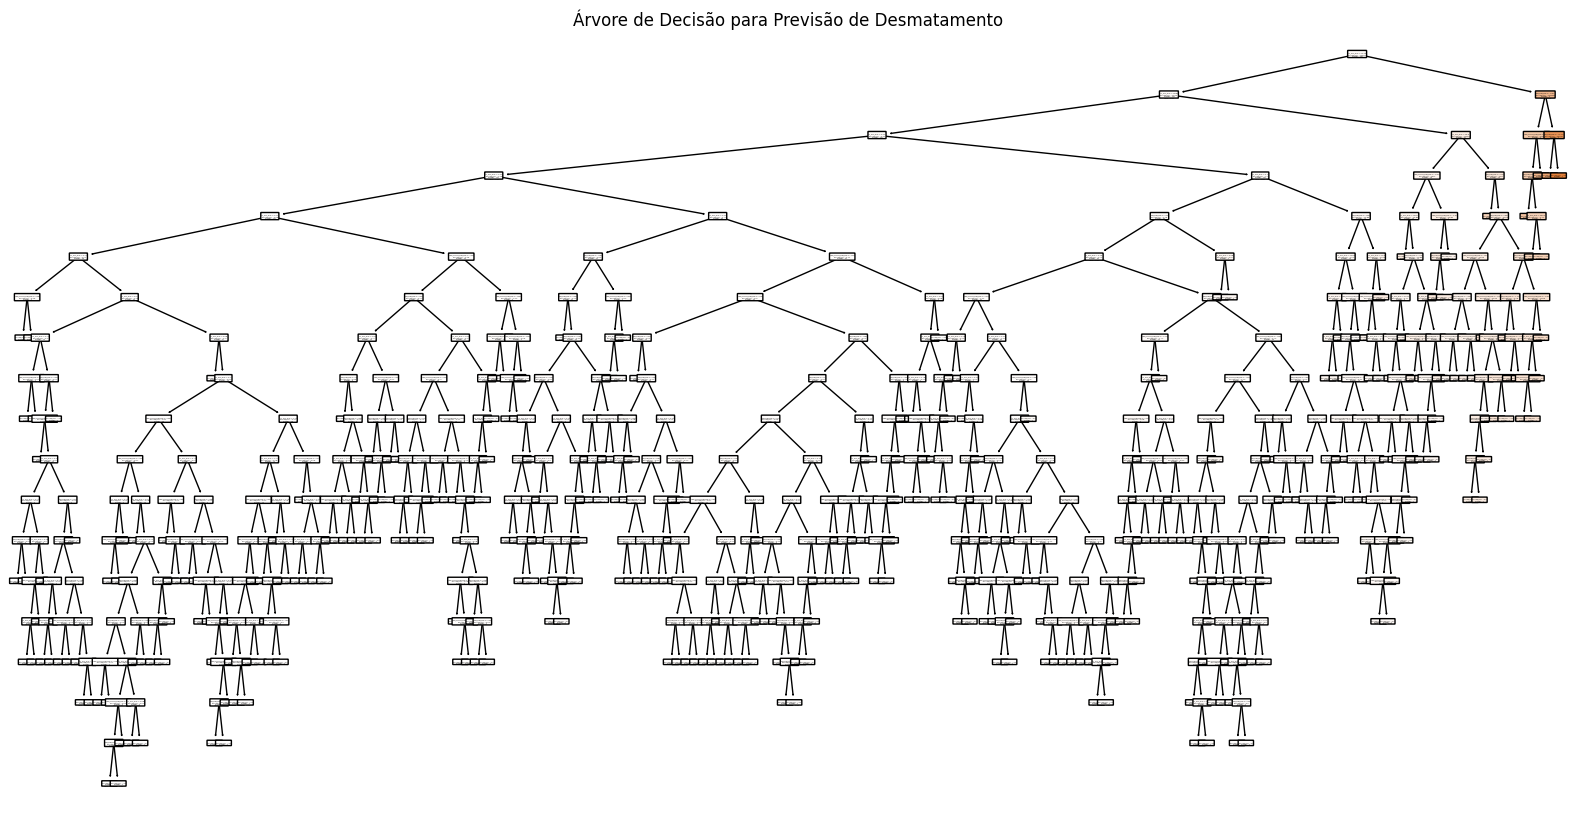


Comparação entre valores reais e previstos:
        Real  Previsto
2268  1.6718    1.3097
404   3.0987    6.4142
1021  1.4963    1.2890
151   1.2744    1.5139
1947  1.6695    1.7014


In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)
df_uc = pd.read_csv(uc_path)

# Selecionar as variáveis de interesse para a análise
# Variáveis preditoras: CAR, APP, Reservas Legais, etc.
# Variável alvo: area_ha (desmatamento)
df = df_alertas[['area_ha', 'car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']].dropna()

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[['car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']]
y = df['area_ha']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de árvore de decisão
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Prever os valores de desmatamento para os dados de teste
y_pred = regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Importância das variáveis
feature_importances = regressor.feature_importances_
print("\nImportância das variáveis:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title('Árvore de Decisão para Previsão de Desmatamento')
plt.show()

# Exibir uma amostra dos valores reais e previstos para comparação
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nComparação entre valores reais e previstos:")
print(df_results.head())


**(NOVO)Análise 4**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 5.158618340885668
R-squared (R2): 0.9075864596805647

Coeficientes da Regressão Ridge:
                        Coeficiente
car_area_sum               0.493683
ppa_area_sum               0.514208
legal_reserve_area_sum    -0.010858

Comparação entre valores reais e previstos:
        Real  Previsto
2268  1.6718  1.562847
404   3.0987  3.741949
1021  1.4963  1.342010
151   1.2744  2.801284
1947  1.6695  2.400418


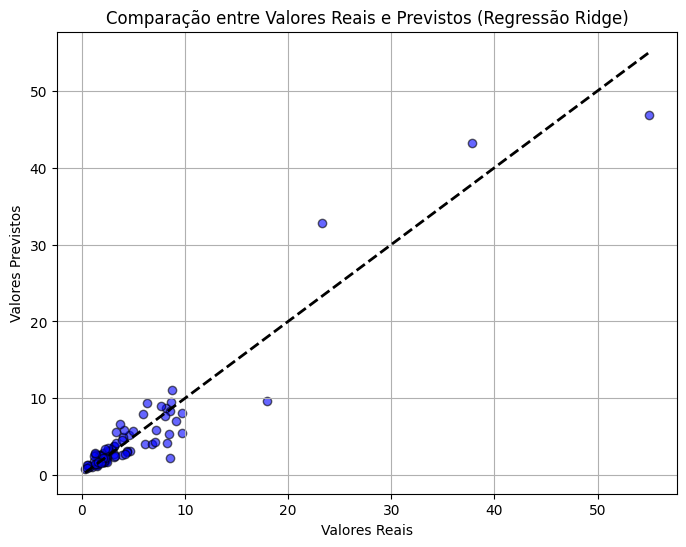

In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)
df_uc = pd.read_csv(uc_path)

# Selecionar as variáveis de interesse para a análise de regressão
df = df_alertas[['area_ha', 'car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']].dropna()

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[['car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']]
y = df['area_ha']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Ridge
ridge_regressor = Ridge(alpha=1.0)  # O parâmetro alpha controla o peso da regularização
ridge_regressor.fit(X_train, y_train)

# Prever os valores de desmatamento para os dados de teste
y_pred = ridge_regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Exibir os coeficientes da regressão (importância de cada variável)
coef_df = pd.DataFrame(ridge_regressor.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes da Regressão Ridge:")
print(coef_df)

# Comparação entre valores reais e previstos
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nComparação entre valores reais e previstos:")
print(df_results.head())

# Visualizar a comparação entre os valores reais e previstos em um gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Regressão Ridge)')
plt.grid(True)
plt.show()


**(NOVO) Análise 5**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 9.069193133073485
R-squared (R2): 0.8375308677857841

Importância das Variáveis:
                        Importância
car_area_sum               0.756809
ppa_area_sum               0.104703
legal_reserve_area_sum     0.138488

Comparação entre valores reais e previstos:
        Real  Previsto
2268  1.6718  1.626714
404   3.0987  5.253538
1021  1.4963  1.060573
151   1.2744  2.285810
1947  1.6695  2.882166


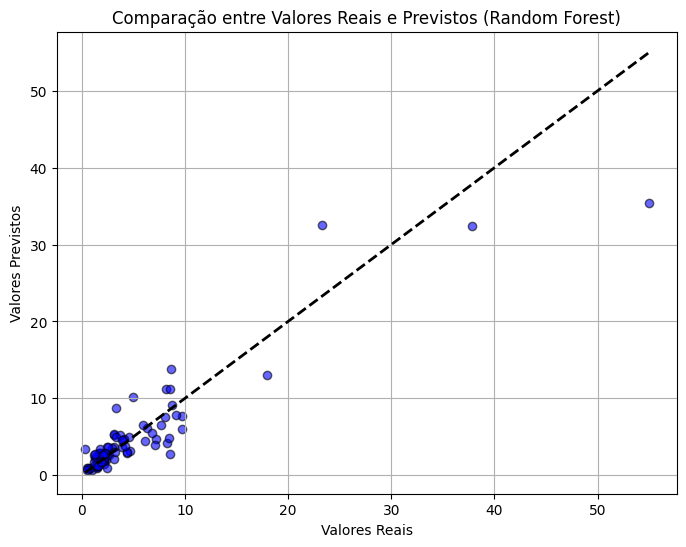

In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)
df_uc = pd.read_csv(uc_path)

# Selecionar as variáveis de interesse para a análise de regressão
df = df_alertas[['area_ha', 'car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']].dropna()

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[['car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']]
y = df['area_ha']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Prever os valores de desmatamento para os dados de teste
y_pred = rf_regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Exibir a importância das variáveis
feature_importances = pd.DataFrame(rf_regressor.feature_importances_, index=X.columns, columns=['Importância'])
print("\nImportância das Variáveis:")
print(feature_importances)

# Comparação entre valores reais e previstos
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nComparação entre valores reais e previstos:")
print(df_results.head())

# Visualizar a comparação entre os valores reais e previstos em um gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Random Forest)')
plt.grid(True)
plt.show()


**(NOVO) Análise 6**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mean Squared Error (MSE): 8.351847295700555
R-squared (R2): 0.8503816863740925

Importância das Variáveis:
                        Importância
car_area_sum               0.832561
ppa_area_sum               0.116390
legal_reserve_area_sum     0.051049

Comparação entre valores reais e previstos:
        Real  Previsto
2268  1.6718  1.756981
404   3.0987  4.310513
1021  1.4963  1.240081
151   1.2744  2.787580
1947  1.6695  2.796149


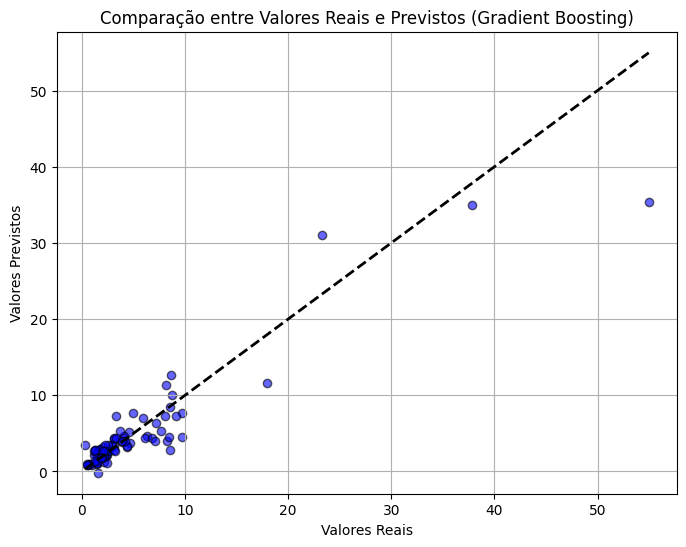

In [ ]:
# Montar o Google Drive (se os arquivos estiverem no Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Caminhos dos arquivos CSV
mapbiomas_alertas_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/alert_report_sc(1).csv'
uc_path = '/content/drive/MyDrive/IA M1/Análises de teste/dados_processados_nao_unificados/uc_final_separador_correto.csv'

# Carregar os CSVs
df_alertas = pd.read_csv(mapbiomas_alertas_path)
df_uc = pd.read_csv(uc_path)

# Selecionar as variáveis de interesse para a análise de regressão
df = df_alertas[['area_ha', 'car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']].dropna()

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df[['car_area_sum', 'ppa_area_sum', 'legal_reserve_area_sum']]
y = df['area_ha']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

# Prever os valores de desmatamento para os dados de teste
y_pred = gb_regressor.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Exibir a importância das variáveis
feature_importances = pd.DataFrame(gb_regressor.feature_importances_, index=X.columns, columns=['Importância'])
print("\nImportância das Variáveis:")
print(feature_importances)

# Comparação entre valores reais e previstos
df_results = pd.DataFrame({'Real': y_test, 'Previsto': y_pred})
print("\nComparação entre valores reais e previstos:")
print(df_results.head())

# Visualizar a comparação entre os valores reais e previstos em um gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos (Gradient Boosting)')
plt.grid(True)
plt.show()
